# **Exploratory Data Analysis on Bank Loan Dataset**

# Business Understanding & Overview
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the
loan are not rejected. We will perform this Exploratory Data Analysis in order to get actionable insights, and convert them into meaningful stories and present it so that the companies can take necessary actions in order to reject or accept loan application.



In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Mounting the Drive and Loading the Dataset

In [3]:
# Loading our first dataset

desc = pd.read_csv("columns_description.csv", encoding = "latin")
desc.head()

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [4]:
# Loading our second dataset

df_app = pd.read_csv("application_data.csv")
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637              -3648   
1                    0.003541      -16765          -1188              -1186   
2                    0.010032      -19046           -225              -4260   
3                    0.008019      -19005          -3039              -9833   
4                    0.028663      -19932          -3038              -4311   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
df_app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DAYS_E

In [6]:
print(f"The data is of the shape: {df_app.shape}")

The data is of the shape: (5047, 122)


### Analyzing the TARGET feature

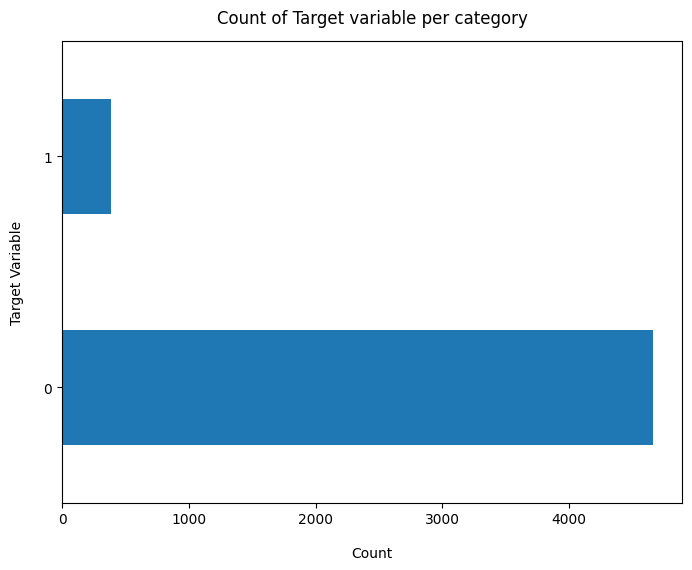

In [7]:
# Lets analyze the TARGET feature

df_app["TARGET"].value_counts().plot(kind = 'barh', figsize = (8, 6))
plt.xlabel("Count", labelpad = 14)
plt.ylabel("Target Variable", labelpad = 14)
plt.title("Count of Target variable per category", y = 1.02);

#### Findings:
* Data is highly imbalanced, ratio is almost
92:8.
* Most of the loans were paid back on time(Target: 0)
* We need to analyse the data with other features while taking the target values separately to get some insights.

In [8]:
print(f'''
unique values are:
{df_app["TARGET"].unique()}

Total percentage of 1s and 0s:
{df_app["TARGET"].value_counts()/len(df_app["TARGET"])}
''')


unique values are:
[1 0]

Total percentage of 1s and 0s:
0    0.922726
1    0.077274
Name: TARGET, dtype: float64



### Checking Missing Values

* Many columns have a lot of missing data (30-70%), some have few missing data (13-19%) and many columns also have no missing data at all.
* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, we do a small analysis below and take some decisions.

Check the columns having more than 30% null values (NaNs). Combining the columns having more than 30% null values along with Description for a better understanding.

In [9]:
emptycol = df_app.isnull().sum()
emptycol = emptycol[emptycol.values > (0.3*len(emptycol))]
emptycol_df = pd.DataFrame(emptycol)
emptycol_df = emptycol_df.reset_index()
emptycol_df = emptycol_df.rename(columns = {"index" : "Row", 0 : "numCount"})
emptycol_df.head()

Row  numCount
0      OWN_CAR_AGE      3340
1  OCCUPATION_TYPE      1563
2     EXT_SOURCE_1      2854
3     EXT_SOURCE_3       984
4   APARTMENTS_AVG      2510

In [10]:
desc_appl_data = desc.loc[desc.Table == "application_data"]

In [11]:
# Just for better understanding 

analyse_emptycol_df = pd.merge(
    left = emptycol_df,
    right = desc_appl_data,
    how = 'inner',
    on = 'Row'
)

analyse_emptycol_df[["Row", "Description"]]

Row  \
0                    OWN_CAR_AGE   
1                OCCUPATION_TYPE   
2                   EXT_SOURCE_1   
3                   EXT_SOURCE_3   
4                 APARTMENTS_AVG   
5               BASEMENTAREA_AVG   
6    YEARS_BEGINEXPLUATATION_AVG   
7                YEARS_BUILD_AVG   
8                 COMMONAREA_AVG   
9                  ELEVATORS_AVG   
10                 ENTRANCES_AVG   
11                 FLOORSMAX_AVG   
12                 FLOORSMIN_AVG   
13                  LANDAREA_AVG   
14          LIVINGAPARTMENTS_AVG   
15                LIVINGAREA_AVG   
16       NONLIVINGAPARTMENTS_AVG   
17             NONLIVINGAREA_AVG   
18               APARTMENTS_MODE   
19             BASEMENTAREA_MODE   
20  YEARS_BEGINEXPLUATATION_MODE   
21              YEARS_BUILD_MODE   
22               COMMONAREA_MODE   
23                ELEVATORS_MODE   
24                ENTRANCES_MODE   
25                FLOORSMAX_MODE   
26                FLOORSMIN_MODE   
27                 LANDAREA_MODE   
28         LIVINGAPARTMENTS_MODE   
29               LIVINGAREA_MODE   
30      NONLIVINGAPARTMENTS_MODE   
31            NONLIVINGAREA_MODE   
32               APARTMENTS_MEDI   
33             BASEMENTAREA_MEDI   
34  YEARS_BEGINEXPLUATATION_MEDI   
35              YEARS_BUILD_MEDI   
36               COMMONAREA_MEDI   
37                ELEVATORS_MEDI   
38                ENTRANCES_MEDI   
39                FLOORSMAX_MEDI   
40                FLOORSMIN_MEDI   
41                 LANDAREA_MEDI   
42         LIVINGAPARTMENTS_MEDI   
43               LIVINGAREA_MEDI   
44      NONLIVINGAPARTMENTS_MEDI   
45            NONLIVINGAREA_MEDI   
46            FONDKAPREMONT_MODE   
47                HOUSETYPE_MODE   
48                TOTALAREA_MODE   
49            WALLSMATERIAL_MODE   
50           EMERGENCYSTATE_MODE   
51    AMT_REQ_CREDIT_BUREAU_HOUR   
52     AMT_REQ_CREDIT_BUREAU_DAY   
53    AMT_REQ_CREDIT_BUREAU_WEEK   
54     AMT_REQ_CREDIT_BUREAU_MON   
55     AMT_REQ_CREDIT_BUREAU_QRT   
56    AMT_REQ_CREDIT_BUREAU_YEAR   

                                          Description  
0                                 Age of client's car  
1        What kind of occupation does the client have  
2          Normalized score from external data source  
3          Normalized score from external data source  
4   Normalized information about building where th...  
5   Normalized information about building where th...  
6   Normalized information about building where th...  
7   Normalized information about building where th...  
8   Normalized information about building where th...  
9   Normalized information about building where th...  
10  Normalized information about building where th...  
11  Normalized information about building where th...  
12  Normalized information about building where th...  
13  Normalized information about building where th...  
14  Normalized information about building where th...  
15  Normalized information about building where th...  
16  Normalized information about building where th...  
17  Normalized information about building where th...  
18  Normalized information about building where th...  
19  Normalized information about building where th...  
20  Normalized information about building where th...  
21  Normalized information about building where th...  
22  Normalized information about building where th...  
23  Normalized information about building where th...  
24  Normalized information about building where th...  
25  Normalized information about building where th...  
26  Normalized information about building where th...  
27  Normalized information about building where th...  
28  Normalized information about building where th...  
29  Normalized information about building where th...  
30  Normalized information about building where th...  
31  Normalized information about building where th...  
32  Normalized information about building where th...  
33  Normalized information about bui

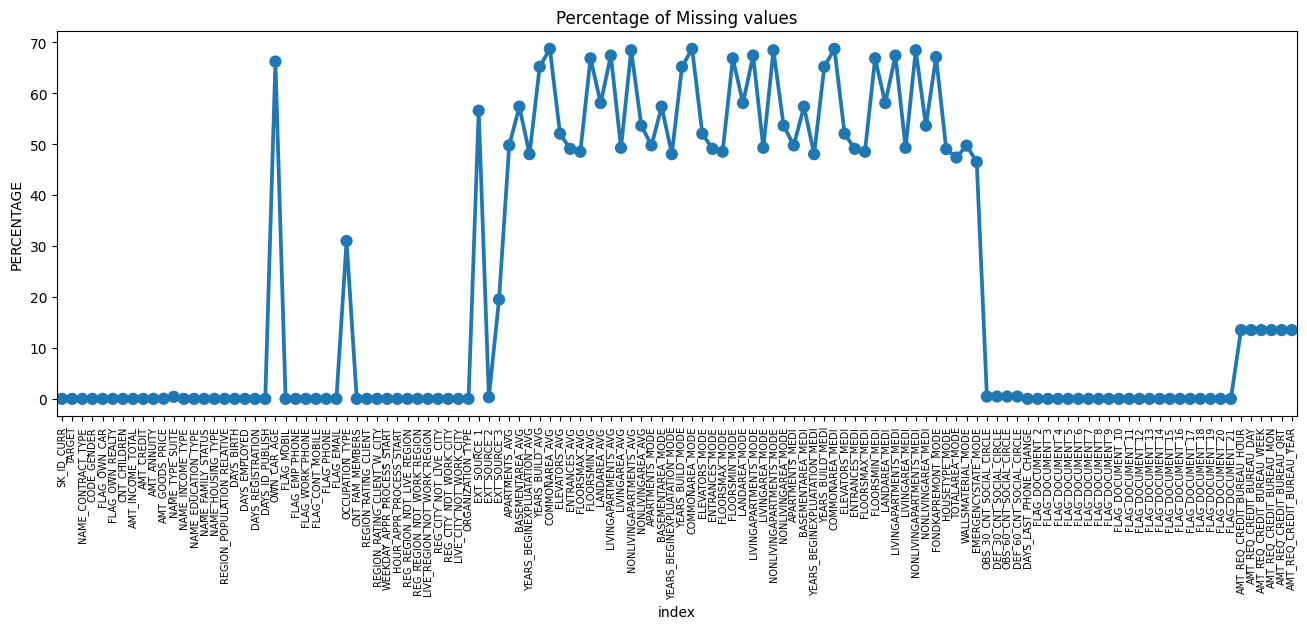

In [12]:
missing = pd.DataFrame((df_app.isnull().sum())*100/df_app.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#### Initial intuition from the data having null values greater than 30% Total columns having more than 30% of null values: 64

As there's no such thumb rule to drop the variables having more than 30% null values, as scenarios might vary from case to case, and the amount of information we think the variable has. For example, most of the columns are Normalized information, and the description is bit unclear, hence I will remove all the Normalized information columns.

However, I will try to keep these columns: AMT_GOODS_PRICE, OWN_CAR_AGE, OCCUPATION_TYPE and analyse further, as these columns seems to carry some important information and two of them are connected with people who have taken Consumer loans, people having their own car flag as Y, and the occupation type might have an impact on the analysis, hence, once proper analysis has been done, we can think of deleting or keeping these variables

In the later stage, we can also analyse the other 61 columns that we are deleting if they carry any important information or not.



In [13]:
emptycol = list(emptycol[emptycol.values >= 0.3].index)

In [14]:
print(emptycol)

['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSM

In [15]:
for element in ['AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE']:
    if element not in emptycol:
        print(f"{element} is not present in the list.")

AMT_GOODS_PRICE is not present in the list.


In [16]:
for element in ['AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE']:
    if element in emptycol:
        emptycol.remove(element)

In [17]:
len(emptycol)

55

In [18]:
# Dropping the emptycol

df_app.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

55


In [19]:
# Checking the columns having less null percentage

df_app.isnull().sum()/len(df_app)*100

SK_ID_CURR            0.0
TARGET                0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
                     ... 
FLAG_DOCUMENT_17      0.0
FLAG_DOCUMENT_18      0.0
FLAG_DOCUMENT_19      0.0
FLAG_DOCUMENT_20      0.0
FLAG_DOCUMENT_21      0.0
Length: 67, dtype: float64

So, 'AMT_ANNUITY' columns is having very few null values rows. Hence let's try to impute the missing values
Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, Hence Median comes to rescue for this and we will fill those missing banks with median value

Filling missing values with median

In [20]:
values=df_app['AMT_ANNUITY'].median()

df_app.loc[df_app['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [21]:
# Columns having null values

df_app.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 67, dtype: int64

Now, all columns have been removed with zero null values.

In [22]:
# Removing rows having null values greater than or equal to 30%

emptyrow=df_app.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df_app)].index)
df_app.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [23]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_app.drop(labels=unwanted,axis=1,inplace=True)

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.
let's find these categorical columns having these 'XNA' values..

In [24]:
# For Gender column

df_app[df_app['CODE_GENDER']=='XNA'].shape

(0, 37)

In [25]:
# For Organization column

df_app[df_app['ORGANIZATION_TYPE']=='XNA'].shape

(914, 37)

So, there are 4 rows from Gender column and 55374 rows from Organization type column.


In [26]:
# Describing the Gender column to check the number of females and males

df_app['CODE_GENDER'].value_counts()

F    3331
M    1716
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.
Updating the column 'CODE_GENDER' with "F" for the dataset.

In [27]:
df_app.loc[df_app['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df_app['CODE_GENDER'].value_counts()

F    3331
M    1716
Name: CODE_GENDER, dtype: int64

In [28]:
# Describing the organization type column

df_app['ORGANIZATION_TYPE'].describe()

count                       5047
unique                        58
top       Business Entity Type 3
freq                        1127
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values.
Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column.

In [29]:
df_app=df_app.drop(df_app.loc[df_app['ORGANIZATION_TYPE']=='XNA'].index)
df_app[df_app['ORGANIZATION_TYPE']=='XNA'].shape

(0, 37)

### Categorical Analysis

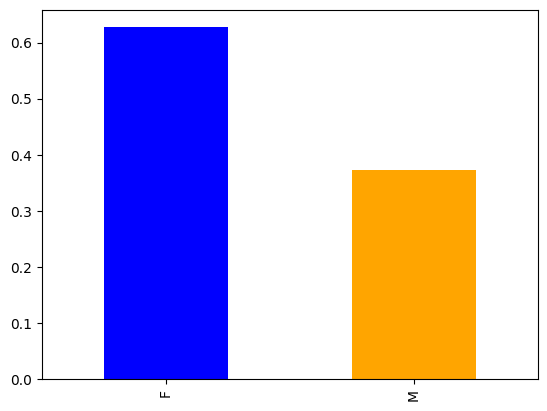

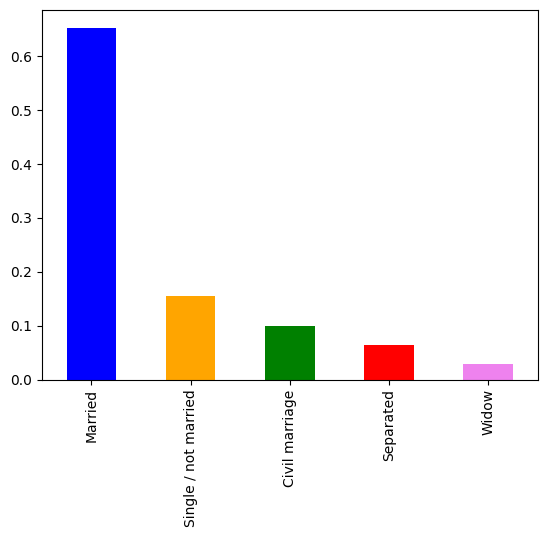

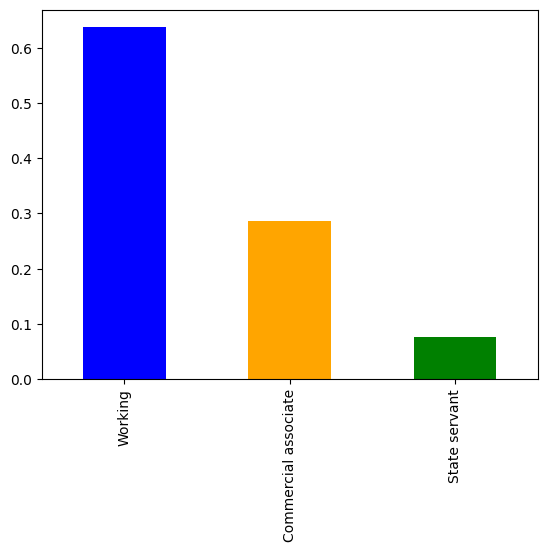

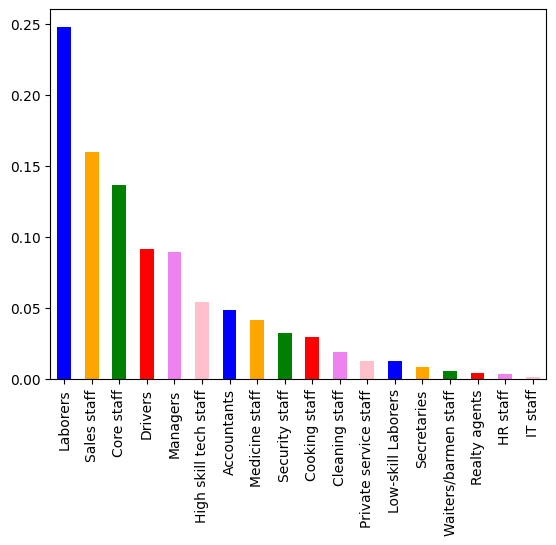

In [30]:
color=['blue','orange','green', 'red', 'violet', 'pink']

df_app.CODE_GENDER.value_counts(normalize=True).plot.bar(color=color)
plt.show()
df_app.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color=color)
plt.show()
df_app.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(color=color)
plt.show()
df_app.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar(color=color)
plt.show()

By just analysing single variables, we won't find much insights related to the defaulters, as here we will just have an idea which category of people are present in abundance, other than that, most of the insights are gathered in analysis of multiple features/variables with target variable.

In [31]:
def plot_features(feature,label_rotation=False,horizontal_layout=True):
    temp = df_app[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'absolute values': temp.values})
    
    t1_percentage = df_app[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    t1_percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    s = sns.barplot(ax=ax1, x = feature, y="absolute values",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=t1_percentage[feature], data=t1_percentage)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('% of applications where loans were NOT repayed', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.subplots_adjust(wspace = .6)

    plt.show();

In [32]:
categorical= df_app.select_dtypes(include=object).columns
categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

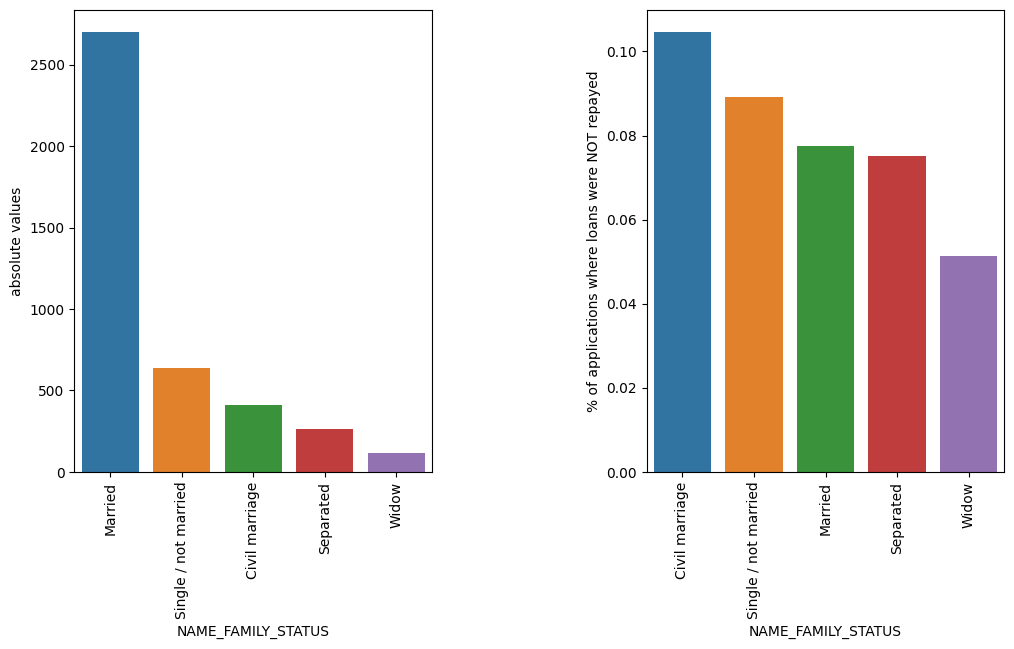

In [33]:
plot_features('NAME_FAMILY_STATUS',True, True)

Most clients are married. Civil marraiges and single people have higher chances of defaulting than others.

In [34]:
df_app['NAME_INCOME_TYPE'].value_counts()

Working                 2633
Commercial associate    1182
State servant            318
Name: NAME_INCOME_TYPE, dtype: int64

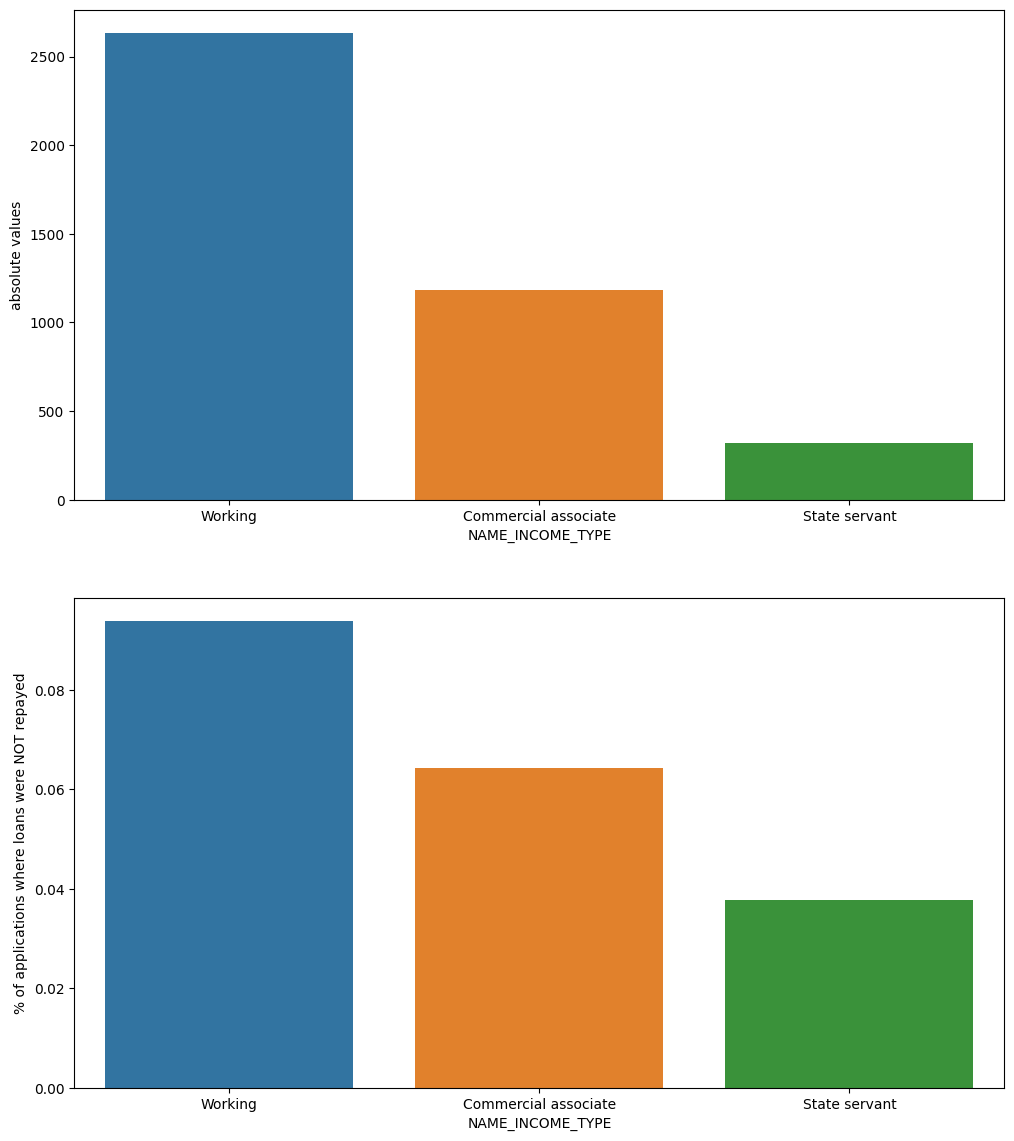

In [35]:
plot_features('NAME_INCOME_TYPE',False,False)

* The working class applies the most for loans, and have a very low default rate, hence they are reliable.
* clients who are unemployed or on maternity leave have very high defaults rates even though they are a minority compared to other income types.
* commercial associates, state servants and pensioners are fairly more reliable.


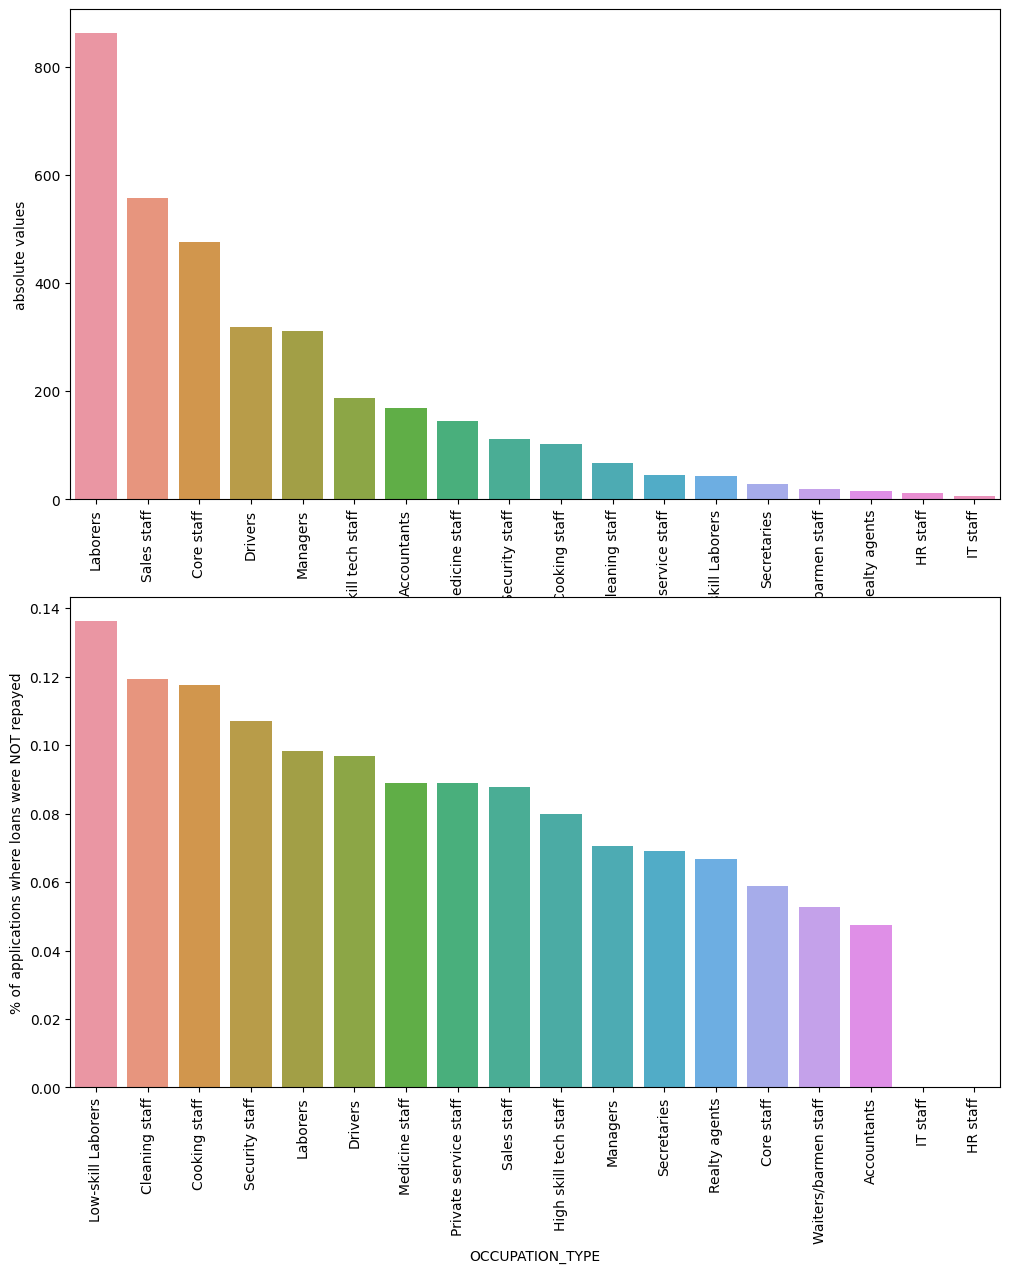

In [36]:
plot_features('OCCUPATION_TYPE',True, False)

* Low skilled labourers, waiters, drivers, especially people with less income range are the most likely to be loan defaulters than highly paid staffs and accountants (which is understandable).
* Better the occupation, lesser the chance of defaulting.

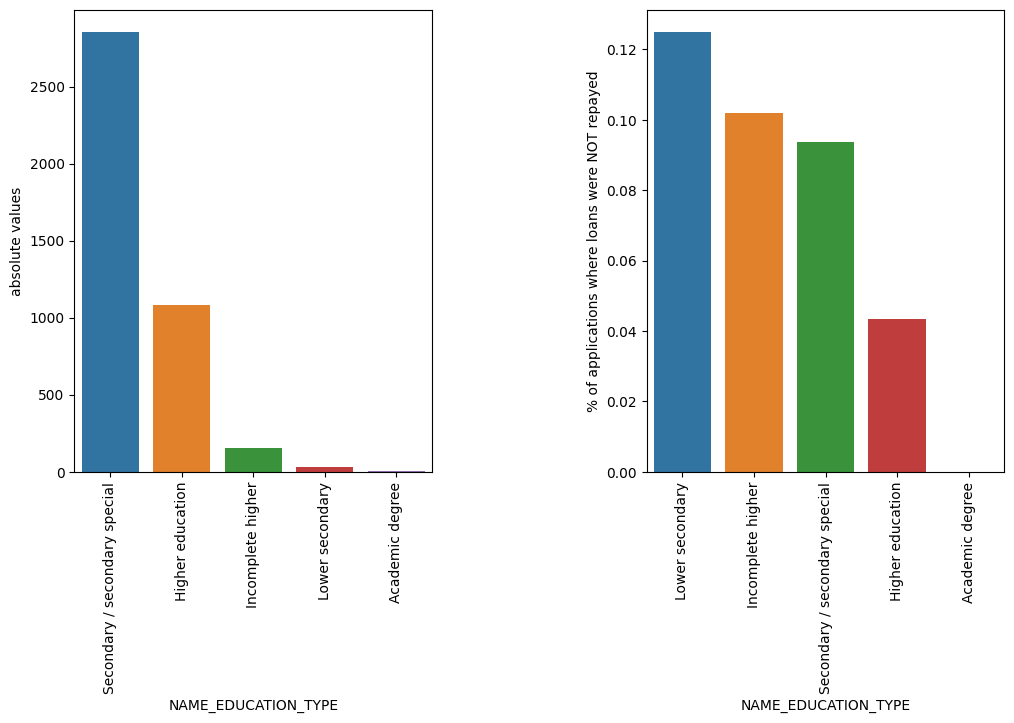

In [37]:
plot_features('NAME_EDUCATION_TYPE',True,True)

* Most student loans are for their secondary education or higher education.
* Lower secondary education loans are most risky for the company followed by secondary/secondary special.

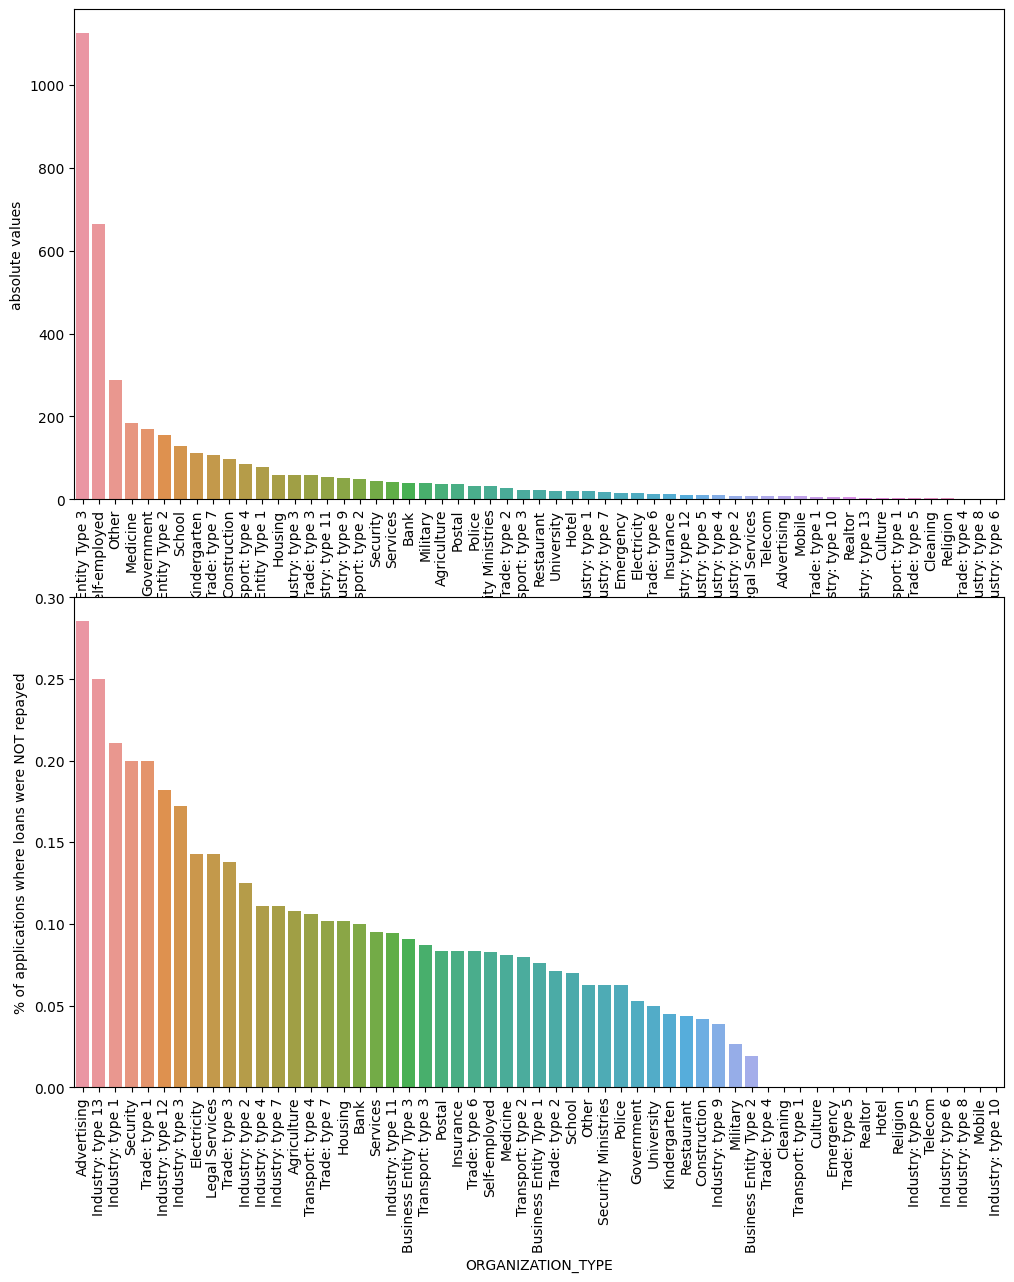

In [38]:
plot_features('ORGANIZATION_TYPE',True, False)

* Organizations with highest percent of loans defaulters are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).
* Business Entity type 3 Trade: type 4, Industry: type 12 organizations are most reliable.

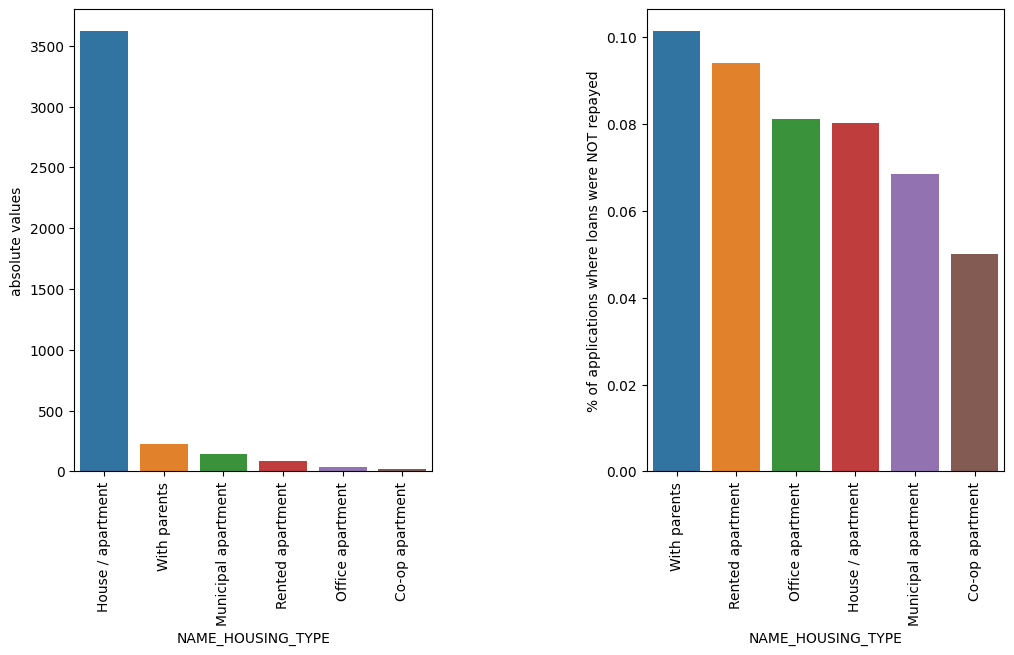

In [39]:
plot_features('NAME_HOUSING_TYPE',True)

* Majority applicants have house/apartment type of housing with around 8% default rate.
* People living in rented appartments or with parents are very rare but also the most risky

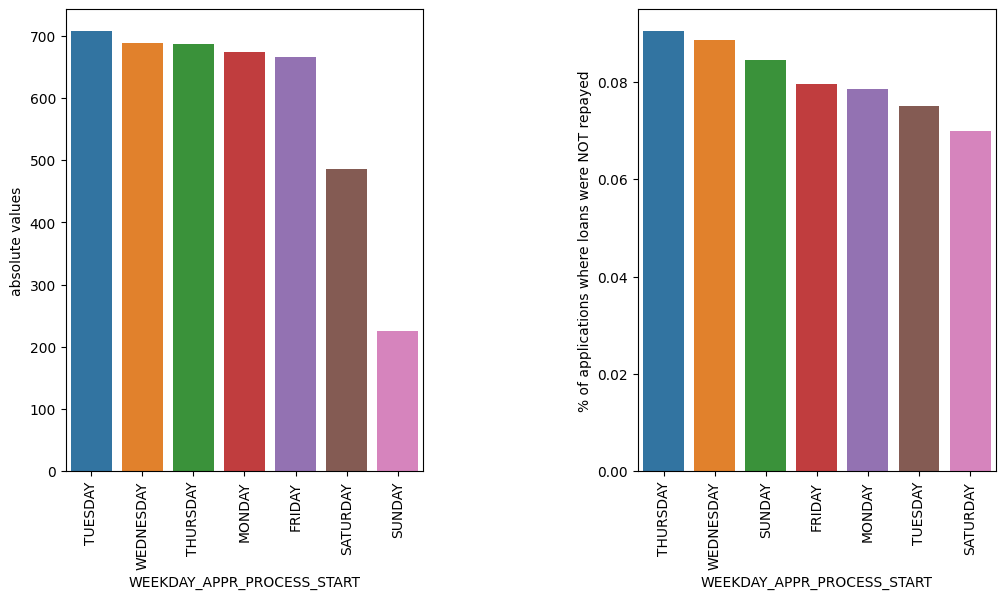

In [40]:
plot_features('WEEKDAY_APPR_PROCESS_START', True)

* Weekdays are more common days for loan application but it doesn't give any insight for defaulters.
* Most clients are not accompanied by anyone when they apply for loan. There is no significant difference in default rates visible.

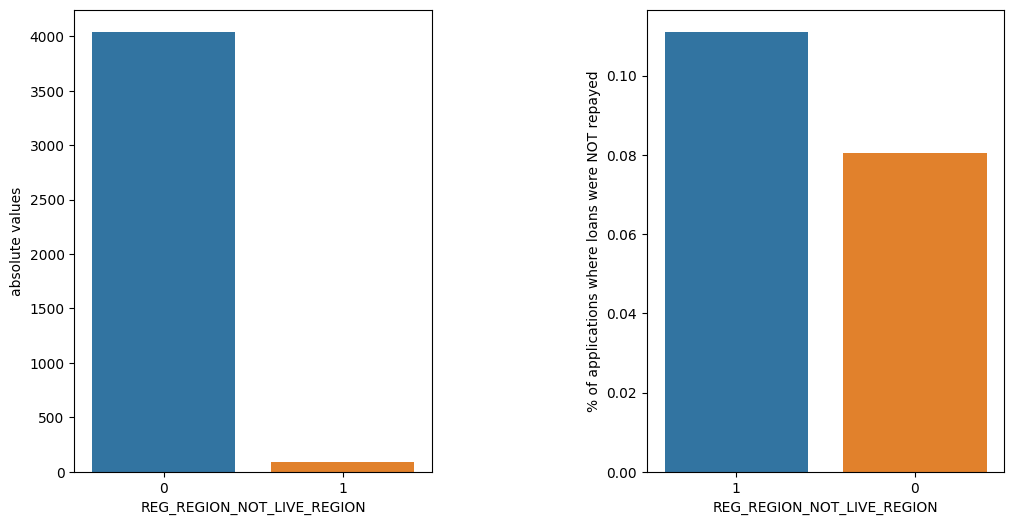

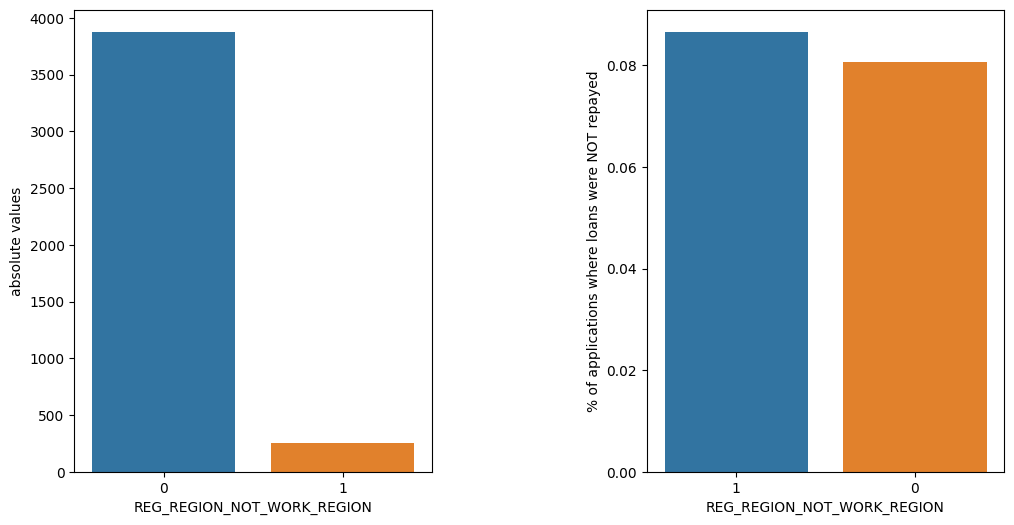

In [41]:
plot_features('REG_REGION_NOT_LIVE_REGION')
plot_features('REG_REGION_NOT_WORK_REGION')

* 'REG_REGION_NOT_LIVE_REGION'= Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
* 'REG_REGION_NOT_WORK_REGION'= Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
* Clients who's permanent addresses do not match contact and work address are rare and more likely to default, hence less reliable

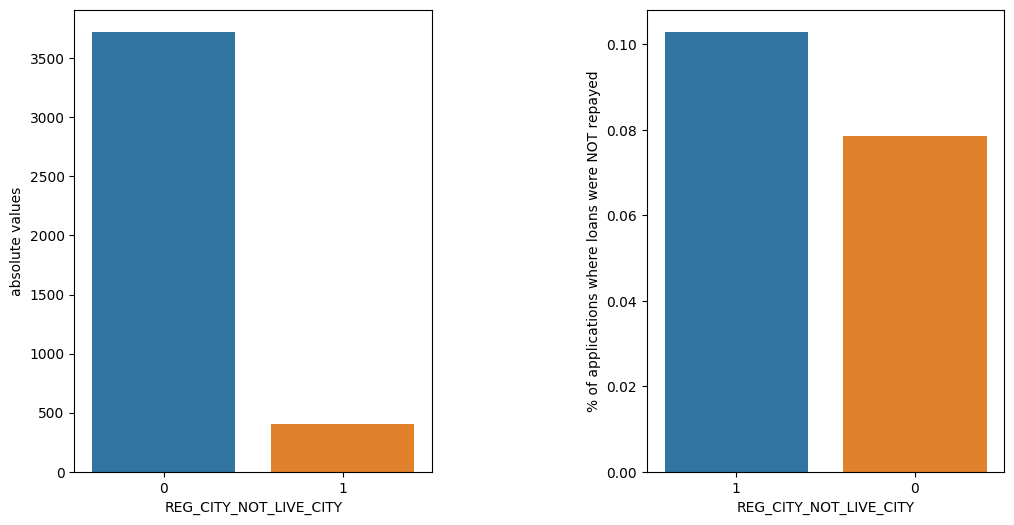

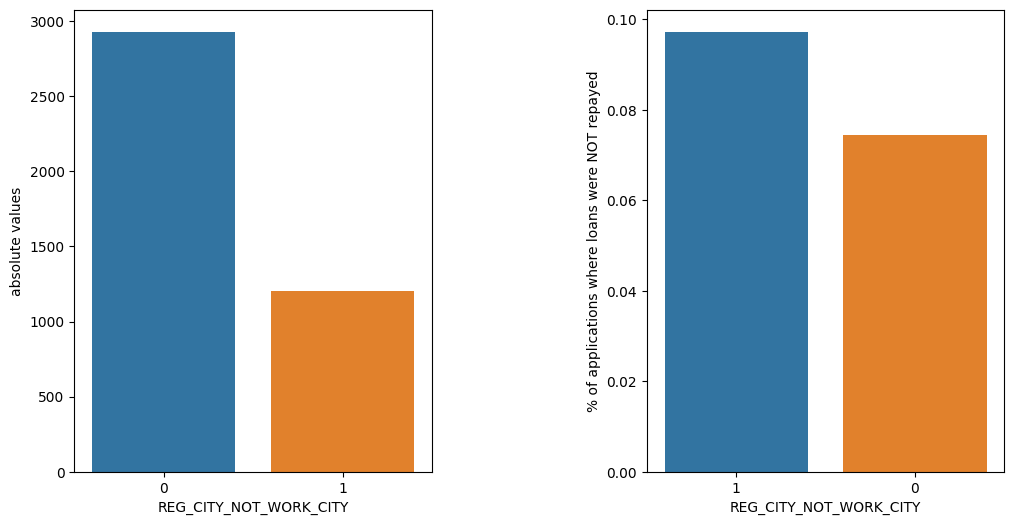

In [42]:
plot_features('REG_CITY_NOT_LIVE_CITY')
plot_features('REG_CITY_NOT_WORK_CITY')

* We see the same people are risky here at city level like we saw in the regional level.
* As city level has a significant difference in defaulter rates, we don't have to consider regional level as a determining factor.

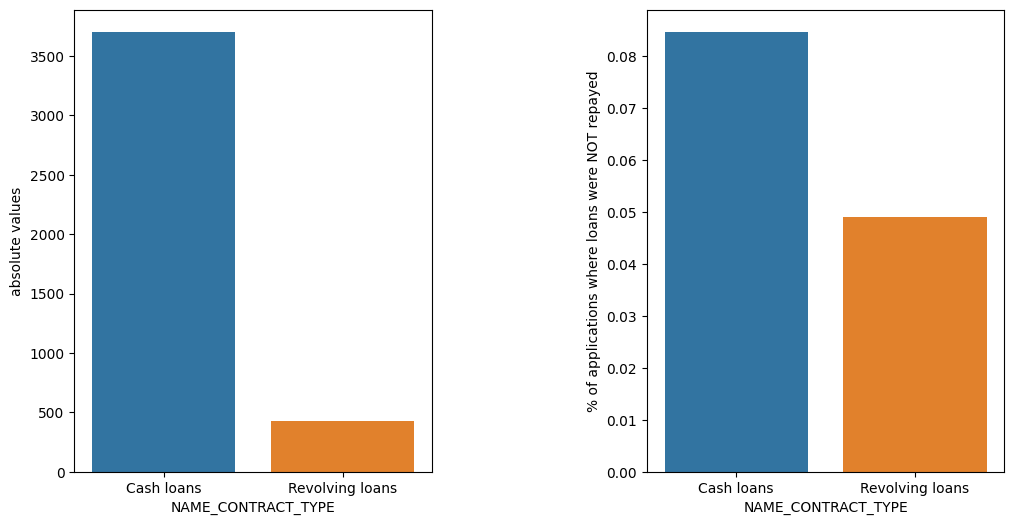

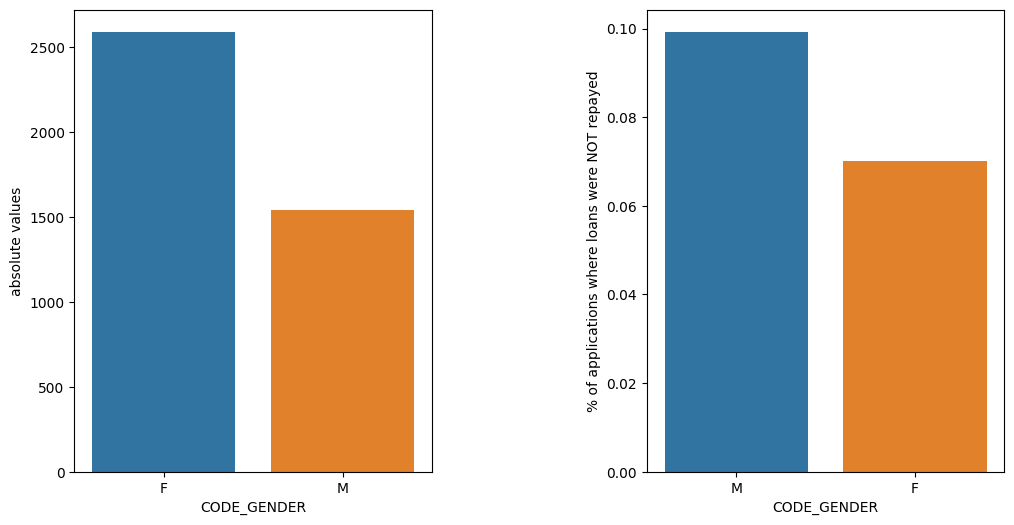

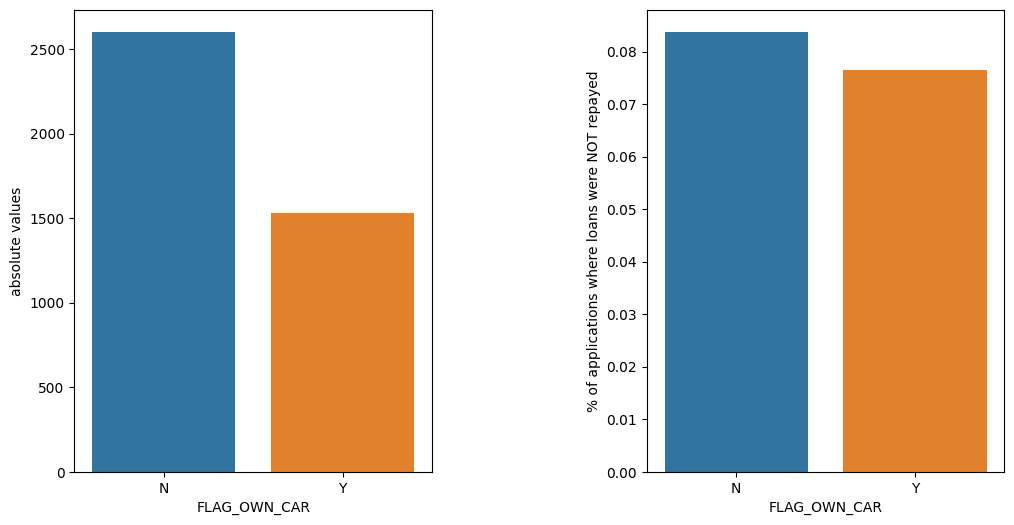

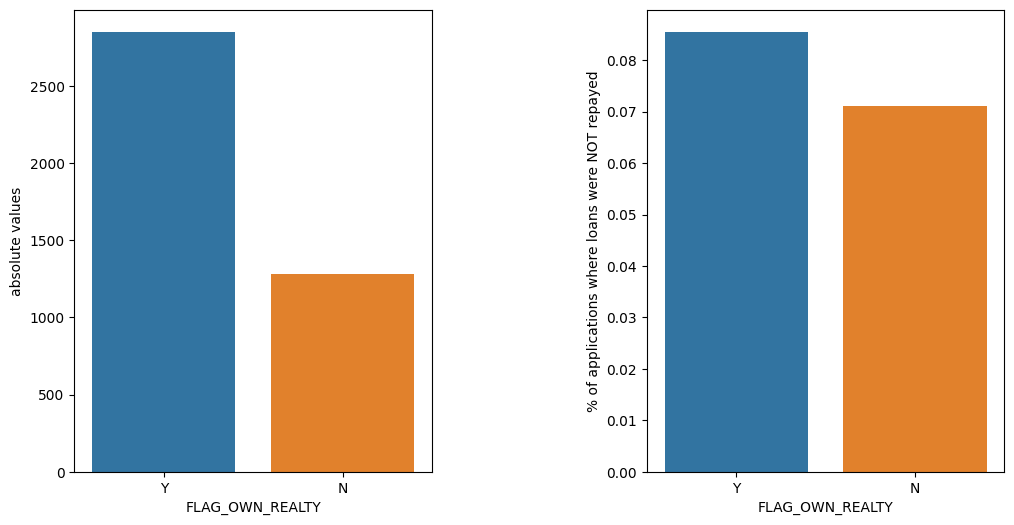

In [43]:
for feature in categorical[:4]:
    plot_features(feature)

* Most of the cash loans are not repayed as compared to Revolving loans.
* Males have a higher chance of defaulting compared to women, even though number of female applicants is alomst twice as more. So females are more reliable than men.
* Clients who own a car are less likely to not repay the loan, which might indicate that Clients with car have a better reliability on loan payments, might be because of multiple reasons (Be it their income range, or some other driving factors)
* Applicants who own real estate are more than double of the ones who don't own real estate. But both categories have around 8% chance of not repaying the loan. So this column doesn't really give us any good insights.

In [44]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df_app[numeric_columns]=df_app[numeric_columns].apply(pd.to_numeric)
df_app.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637              -3648   
1                    0.003541      -16765          -1188              -1186   
2                    0.010032      -19046           -225              -4260   
3                    0.008019      -19005          -3039              -9833   
4                    0.028663      -19932          -3038              -4311   

   DAYS_ID_PUBLISH  OWN_CAR_AGE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0            -2120          NaN        Laborers                  WEDNESDAY   
1             -291          NaN      Core staff                     MONDAY   
2            -2531         26.0        Laborers                     MONDAY   
3            -2437          NaN        Laborers                  WEDNESDAY   
4            -3458          NaN      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                       2.0   
1                  School      0.622246             

### Derived Metrics

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [45]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df_app['AMT_INCOME_RANGE']=pd.cut(df_app['AMT_INCOME_TOTAL'],bins,labels=slot)
df_app.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   
20      100024       0    Revolving loans           M            Y   
21      100025       0         Cash loans           F            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
1                N             0          270000.0   1293502.5      35698.5   
2                Y             0           67500.0    135000.0       6750.0   
3                Y             0          135000.0    312682.5      29686.5   
4                Y             0          121500.0    513000.0      21865.5   
5                Y             0           99000.0    490495.5      27517.5   
6                Y             1          171000.0   1560726.0      41301.0   
7                Y             0          360000.0   1530000.0      42075.0   
9                Y             0          135000.0    405000.0      20250.0   
10               Y             1          112500.0    652500.0      21177.0   
12               Y             0           67500.0     80865.0       5881.5   
13               N             1          225000.0    918468.0      28966.5   
14               Y             0          189000.0    773680.5      32778.0   
15               Y             0          157500.0    299772.0      20160.0   
16               N             0          108000.0    509602.5      26149.5   
17               Y             1           81000.0    270000.0      13500.0   
18               Y             0          112500.0    157500.0       7875.0   
19               Y             1           90000.0    544491.0      17563.5   
20               Y             0          135000.0    427500.0      21375.0   
21               Y             1          202500.0   1132573.5      37561.5   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0    Unaccompanied               Working   
1         1129500.0           Family         State servant   
2          135000.0    Unaccompanied               Working   
3          297000.0    Unaccompanied               Working   
4          513000.0    Unaccompanied               Working   
5          454500.0  Spouse, partner         State servant   
6         1395000.0    Unaccompanied  Commercial associate   
7         1530000.0    Unaccompanied         State servant   
9          405000.0    Unaccompanied               Working   
10         652500.0    Unaccompanied               Working   
12          67500.0    Unaccompanied               Working   
13         697500.0    Unaccompanied               Working   
14         679500.0    Unaccompanied               Working   
15   

Dividing the dataset into two dataset of target=1(client with payment difficulties) and target=0(all other)

In [46]:
target0_df_app=df_app.loc[df_app["TARGET"]==0]
target1_df_app=df_app.loc[df_app["TARGET"]==1]

In [47]:
target0_df_app.shape, target1_df_app.shape

((3798, 38), (335, 38))

Calculating Imbalance percentage
Since the majority is target0 and minority is target1

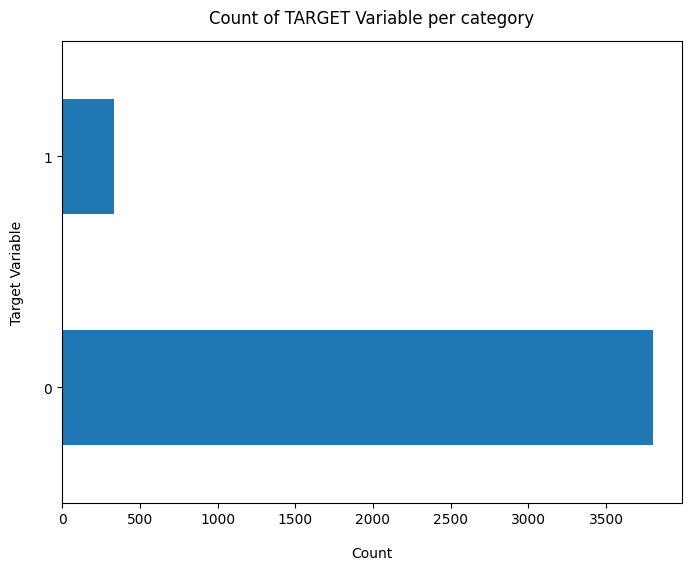

In [48]:
df_app['TARGET'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [49]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

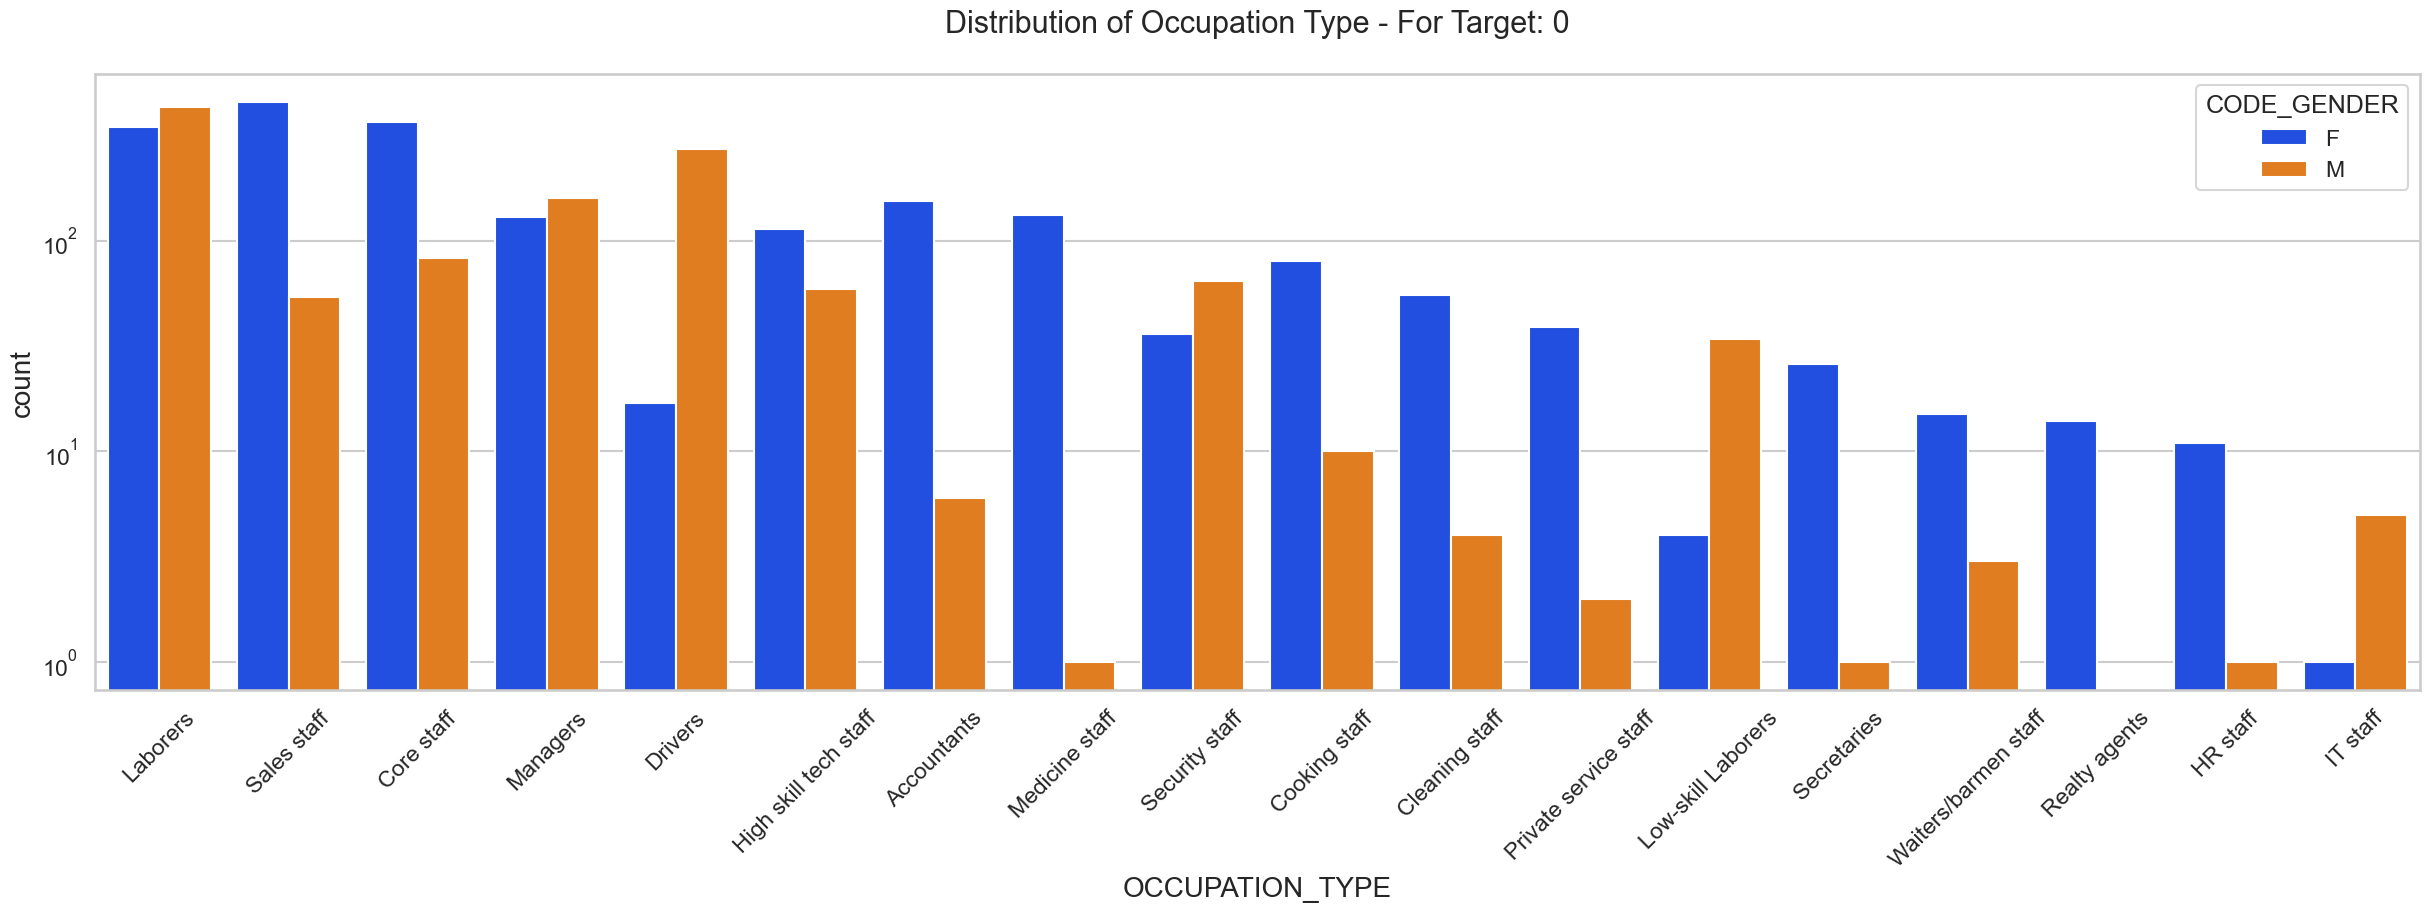

In [50]:
uniplot(target0_df_app,col='OCCUPATION_TYPE',title='Distribution of Occupation Type - For Target: 0',hue='CODE_GENDER')

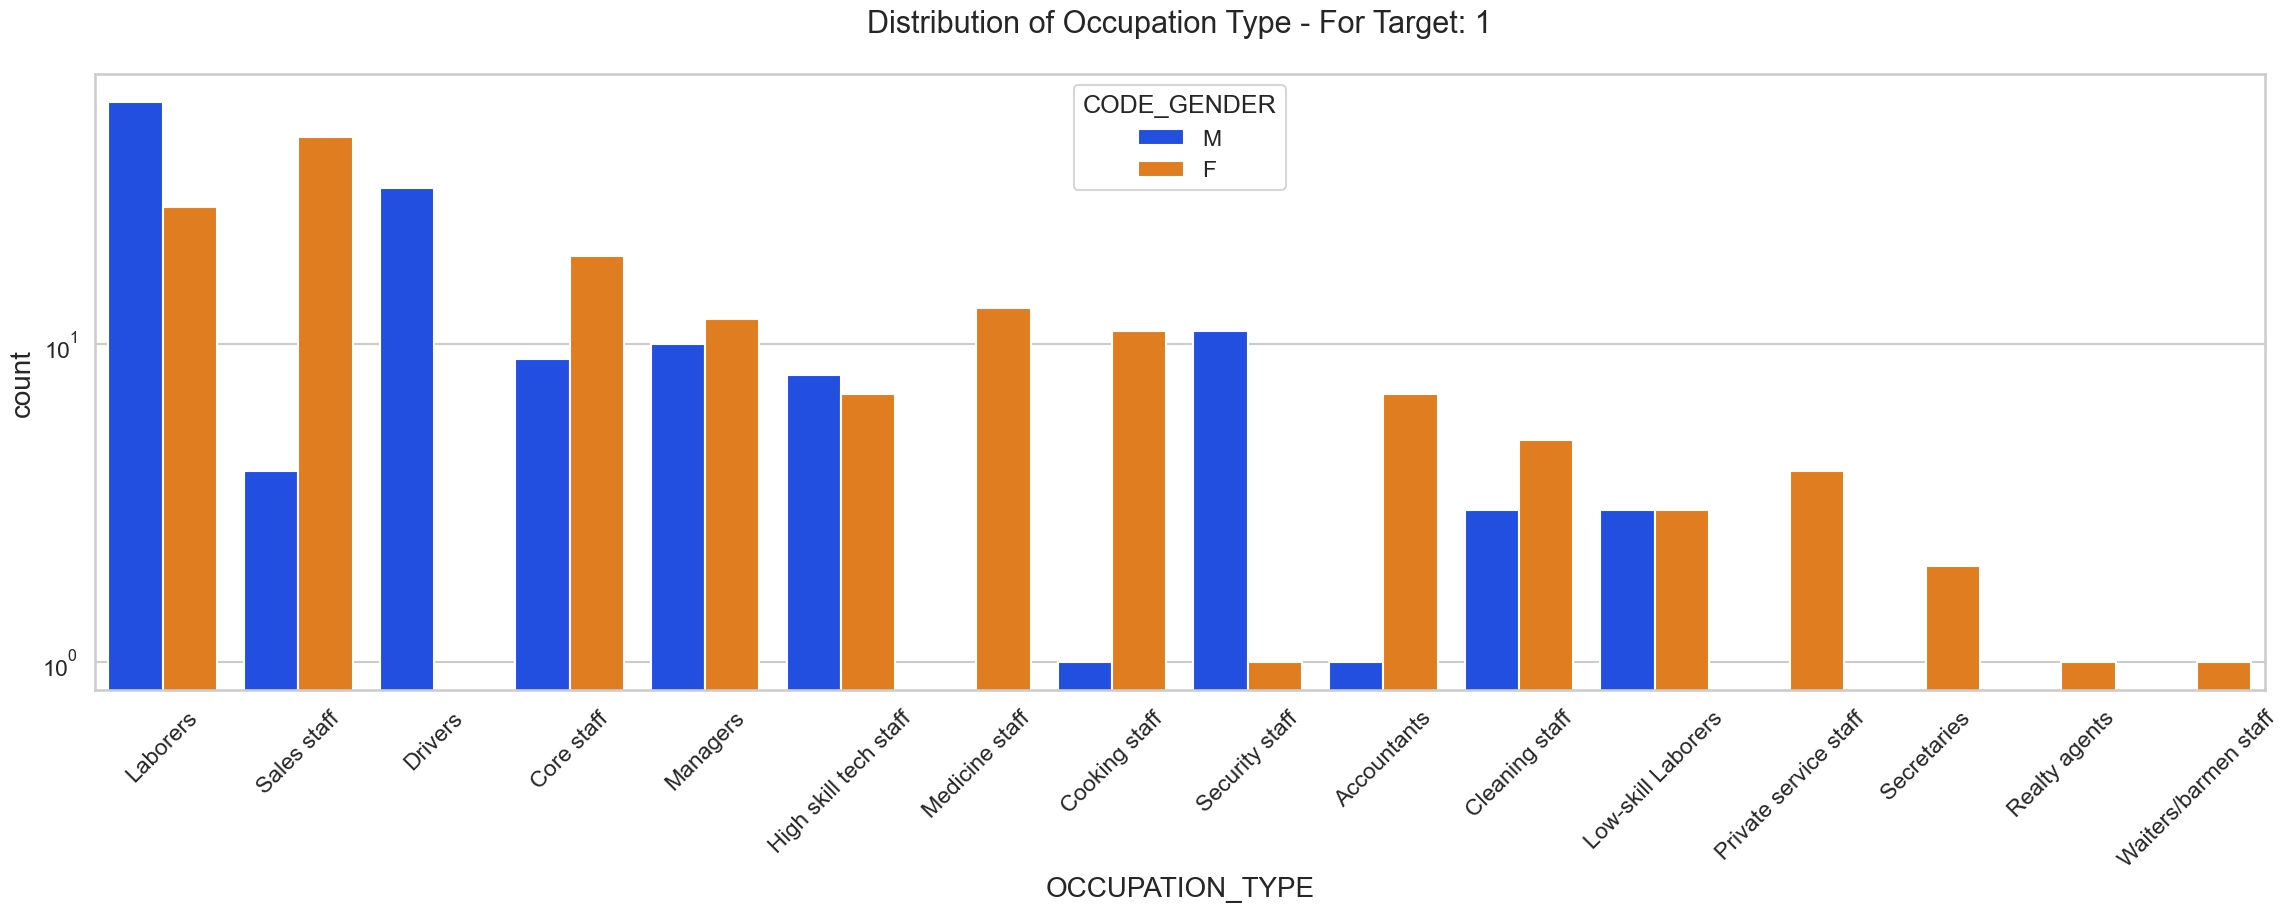

In [51]:
uniplot(target1_df_app,col='OCCUPATION_TYPE',title='Distribution of Occupation Type - For Target: 1',hue='CODE_GENDER')


<Axes: xlabel='CODE_GENDER', ylabel='OCCUPATION_TYPE'>

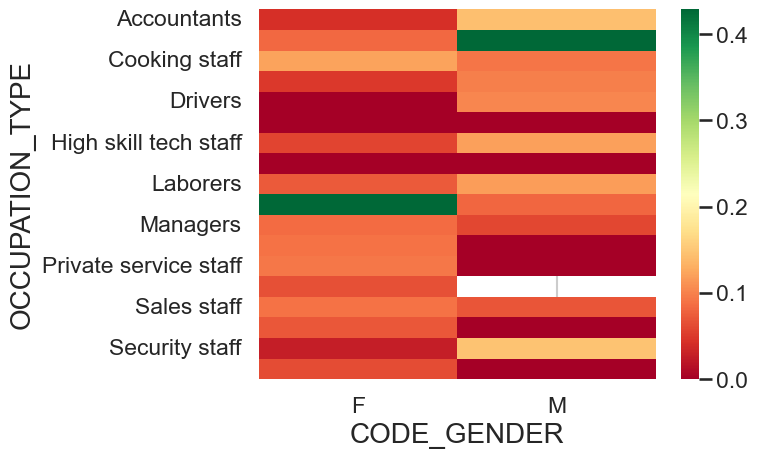

In [52]:
res = pd.pivot_table(data=df_app, index='OCCUPATION_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

Points to be concluded from the above Gender vs Occupation Type Analysis against Target variable:

* Female with Occupation type: Accountants, Private Service Staff, Cooking staff, HR staff, and etc professions are the most defaulters as compared to their counterpart males.
* Male low skill labourers have also high default rate

Good insight 1: Female under occupation: Accountants, Private Service Staff, Secretaries, Realty Agents, HR Staff etc are the most defaulted sub categories against their male counter parts.

Good insight 2: Male under occupation: Low Skilled Labourers, Drivers etc are the most defaulted sub categories against their female counter parts.

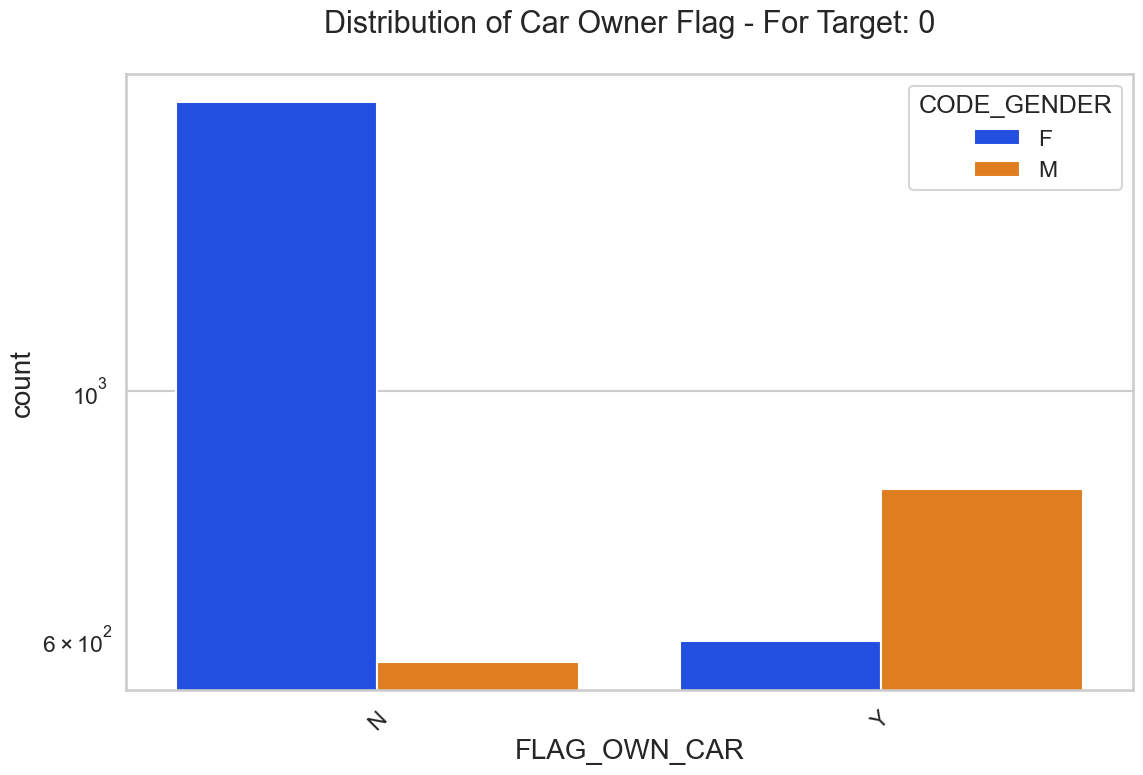

In [53]:
uniplot(target0_df_app,col='FLAG_OWN_CAR',title='Distribution of Car Owner Flag - For Target: 0',hue='CODE_GENDER')

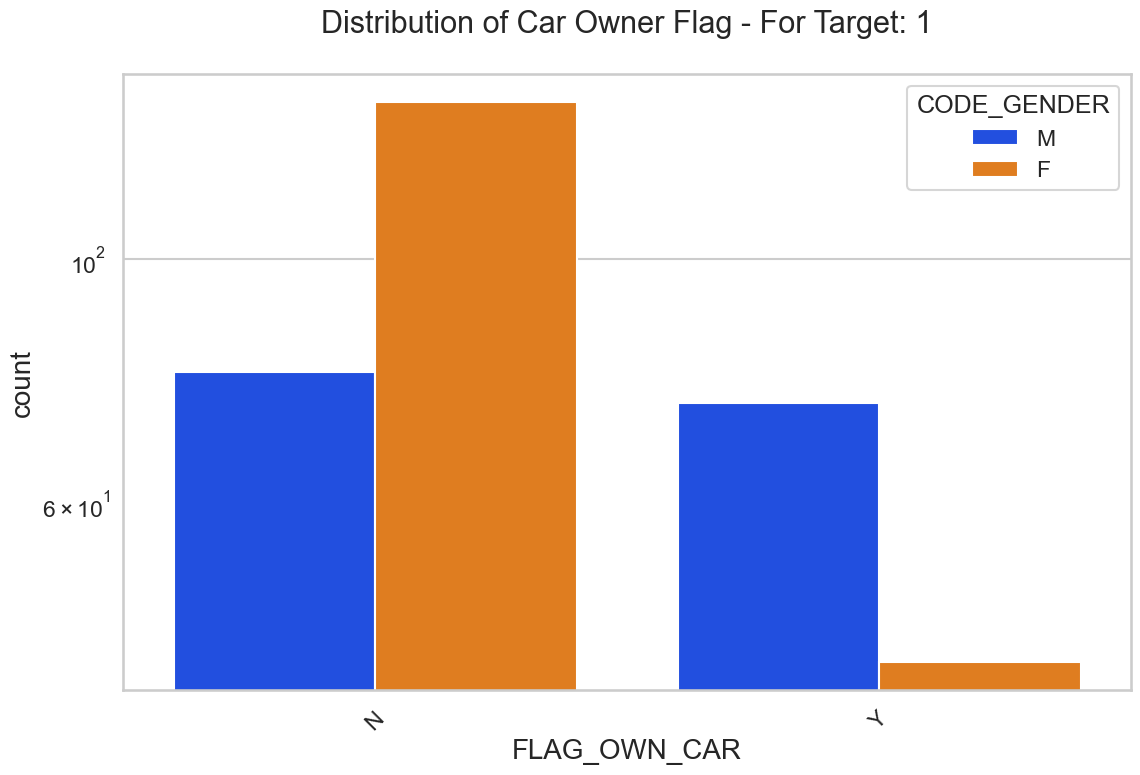

In [54]:
uniplot(target1_df_app,col='FLAG_OWN_CAR',title='Distribution of Car Owner Flag - For Target: 1',hue='CODE_GENDER')

<Axes: xlabel='CODE_GENDER', ylabel='FLAG_OWN_CAR'>

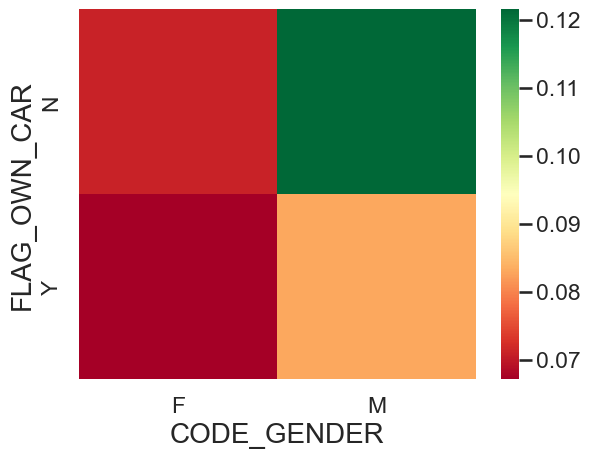

In [55]:
res = pd.pivot_table(data=df_app, index='FLAG_OWN_CAR', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

Points to be concluded from the above Gender vs Own Car Flag variable against Target variable:

* As per the heatmap, Male candidates without car are the one's with highest default rate as compared to other 3 sub categories.
* But as per the bar plot, overall people without cars are most defaulters, if we further dig in, females without car are the most defaulters as compared to the males without cars.

Good insight 1: Overall people without cars are most defaulters, if we further dig in, females without car are the most defaulters as compared to the males without cars.¶

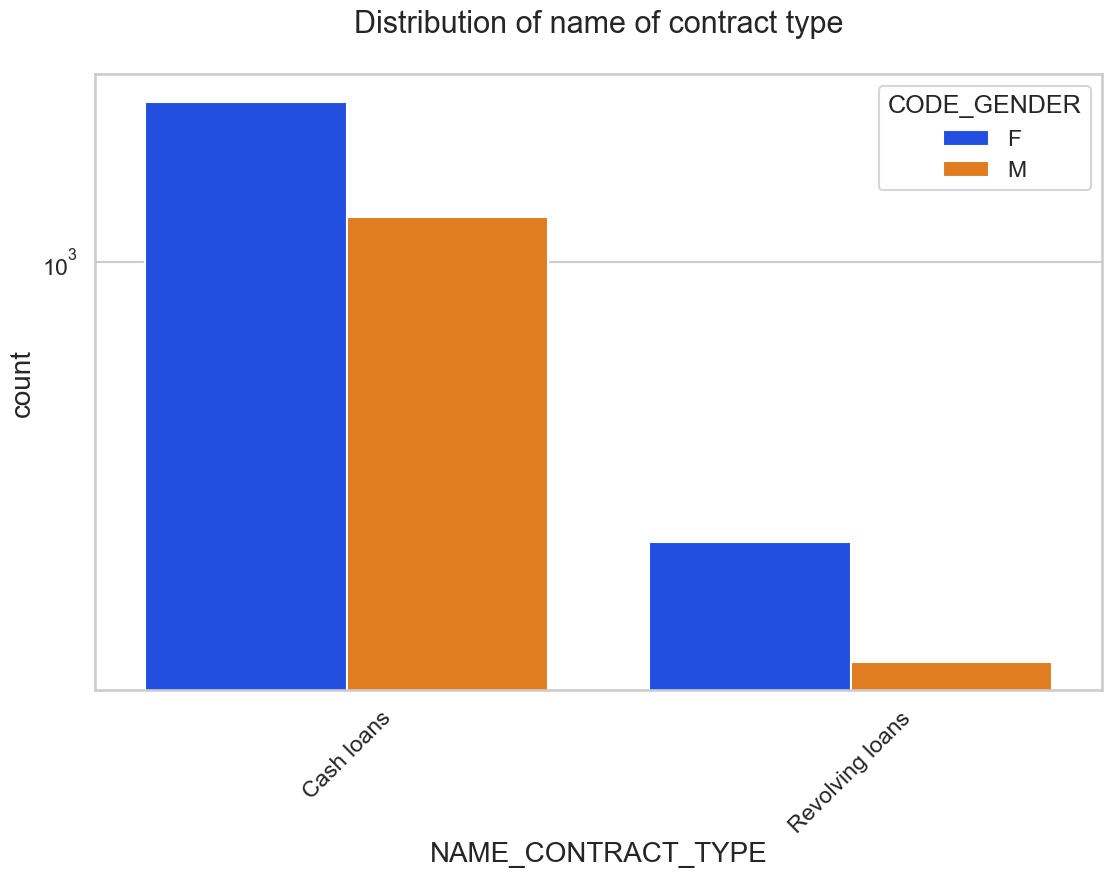

In [56]:
uniplot(target0_df_app,col='NAME_CONTRACT_TYPE',title='Distribution of name of contract type',hue='CODE_GENDER')

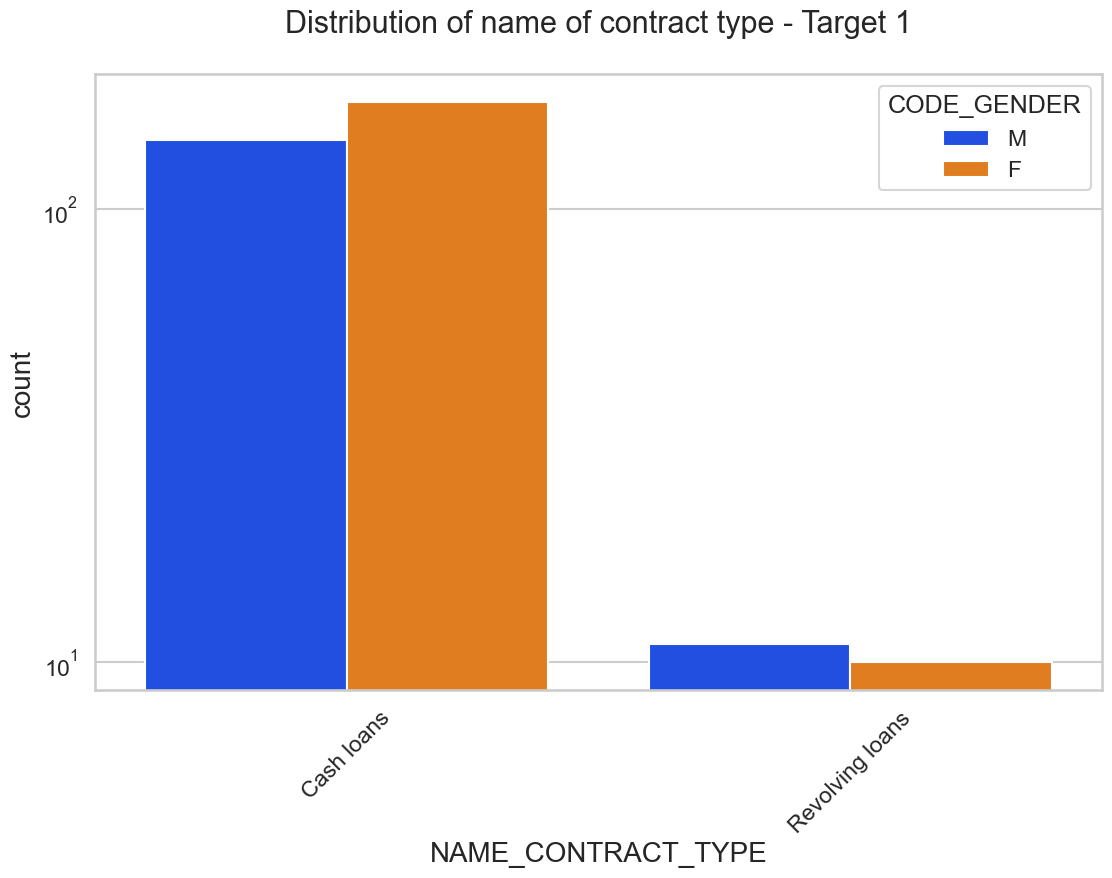

In [57]:
uniplot(target1_df_app,col='NAME_CONTRACT_TYPE',title='Distribution of name of contract type - Target 1',hue='CODE_GENDER')

<Axes: xlabel='CODE_GENDER', ylabel='NAME_CONTRACT_TYPE'>

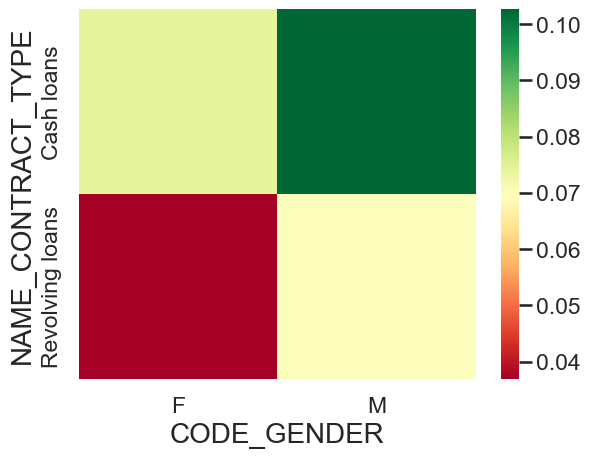

In [58]:
res = pd.pivot_table(data=df_app, index='NAME_CONTRACT_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

Points to be concluded from the above Gender vs Income Range Analysis against Target variable:

* For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
* For this also Female is leading for applying credits.

Good insight: As per the heatmap, Male candidates with cash loans are the one's with highest default rate as compared to other 3 sub categories, but analyzing alongwith the bar plot, it's clear that both males/females having cash loans have almost equal ratio in defaulting, but looking at the revolving loans, even though the numbers are less, but the females who have taken revolving loans are the highest defaulters as compared to their male counter parts.

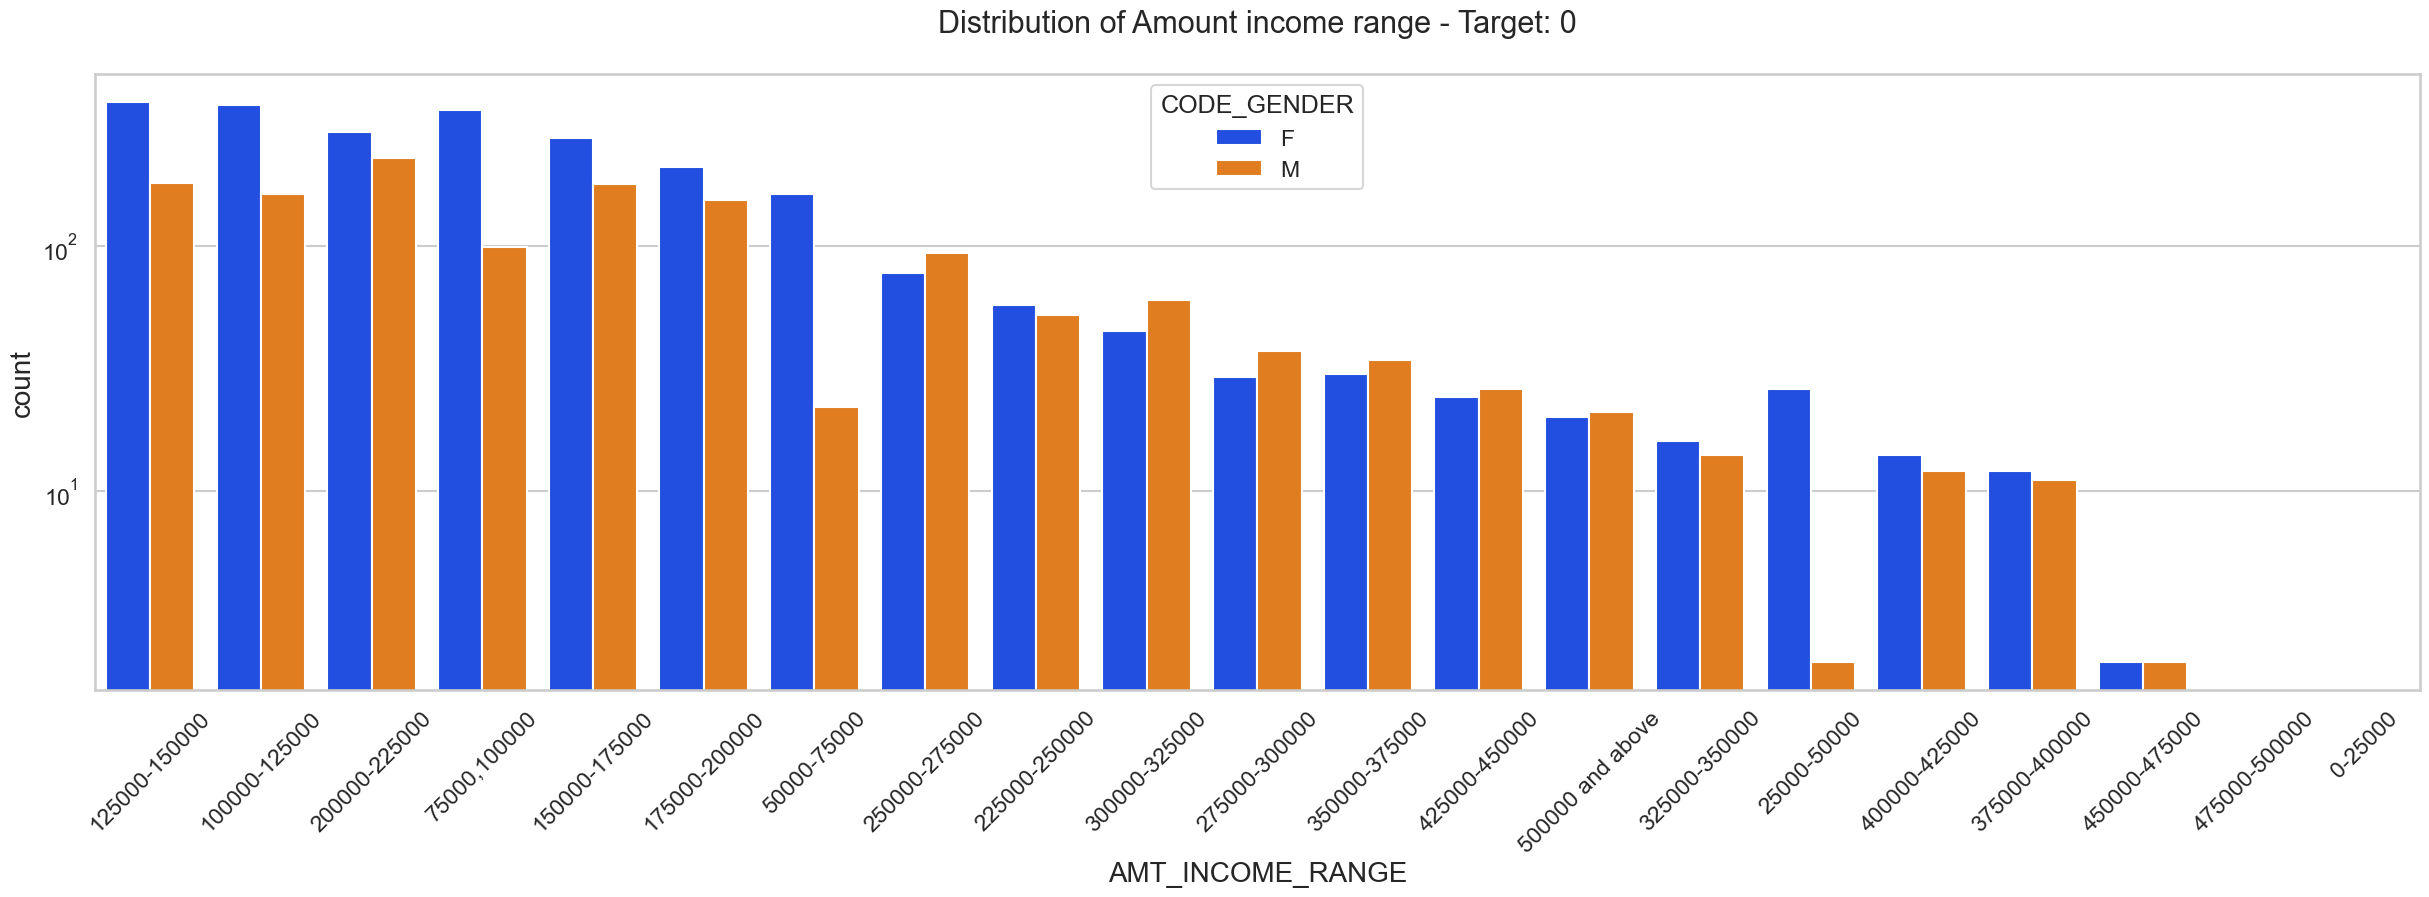

In [59]:
uniplot(target0_df_app,col='AMT_INCOME_RANGE',title='Distribution of Amount income range - Target: 0',hue='CODE_GENDER')


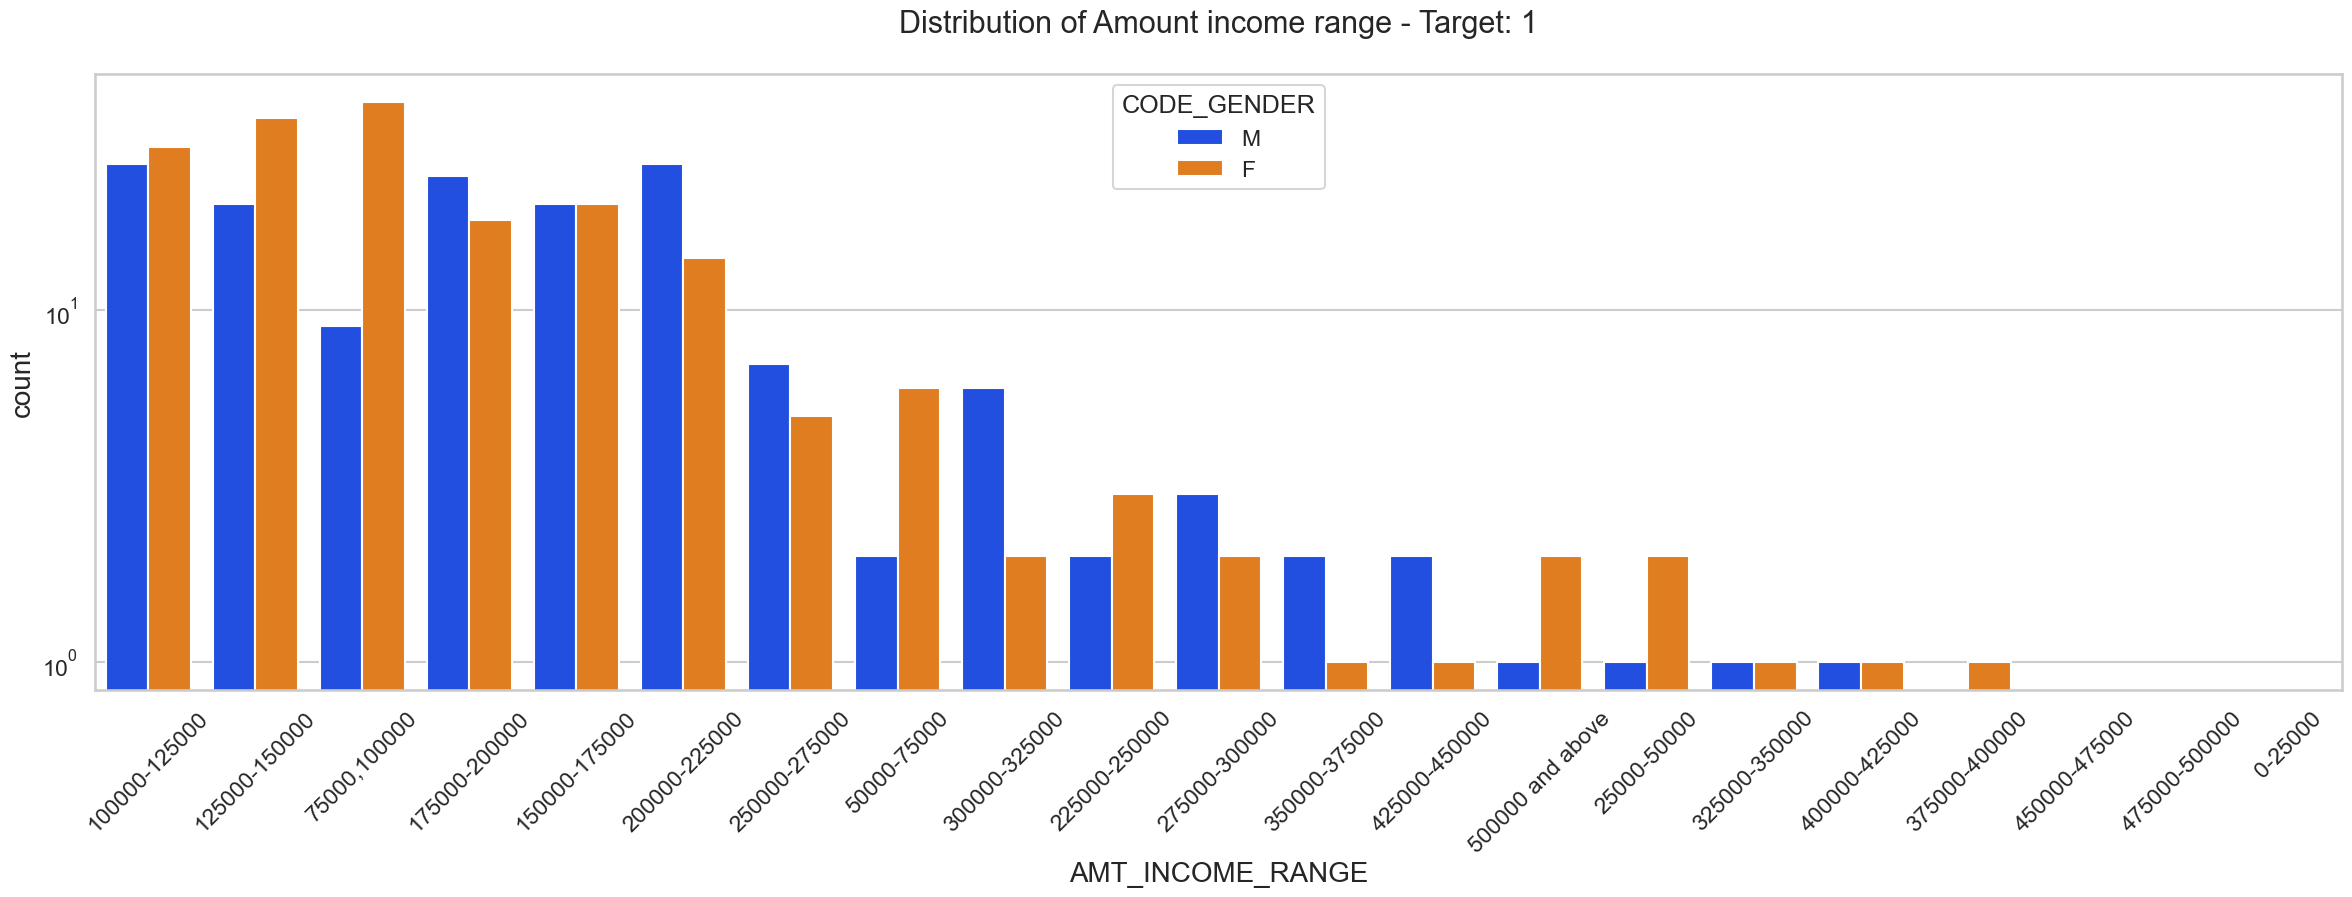

In [60]:
uniplot(target1_df_app,col='AMT_INCOME_RANGE',title='Distribution of Amount income range - Target: 1',hue='CODE_GENDER')

<Axes: xlabel='CODE_GENDER', ylabel='AMT_INCOME_RANGE'>

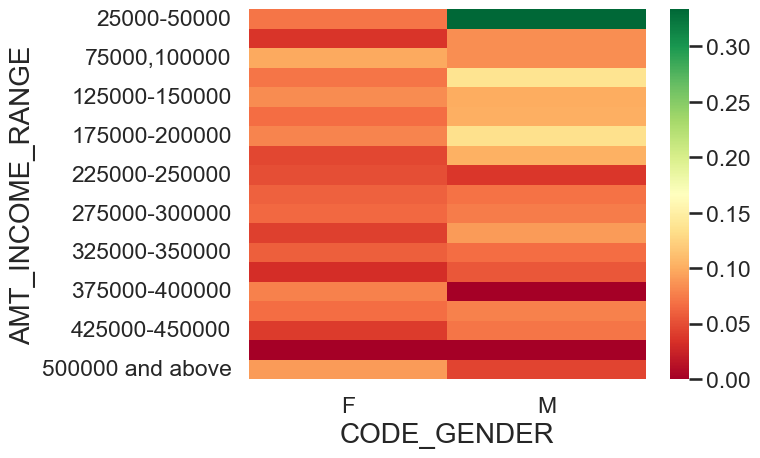

In [61]:
res = pd.pivot_table(data=df_app, index='AMT_INCOME_RANGE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

Points to be concluded from the above Gender vs Income Range Analysis against Target variable:

For target: 0

1. Female counts are higher than male.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. Very less count for income range 400000 and above.

For target: 1

1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 400000 and above.

Good insight: Male: Female ratio is almost 1:2, but looking at the heatmap, overally we can conclude that Male candidates with less income range are the most defaulters, the default rate keeps decreasing as the income range increases.

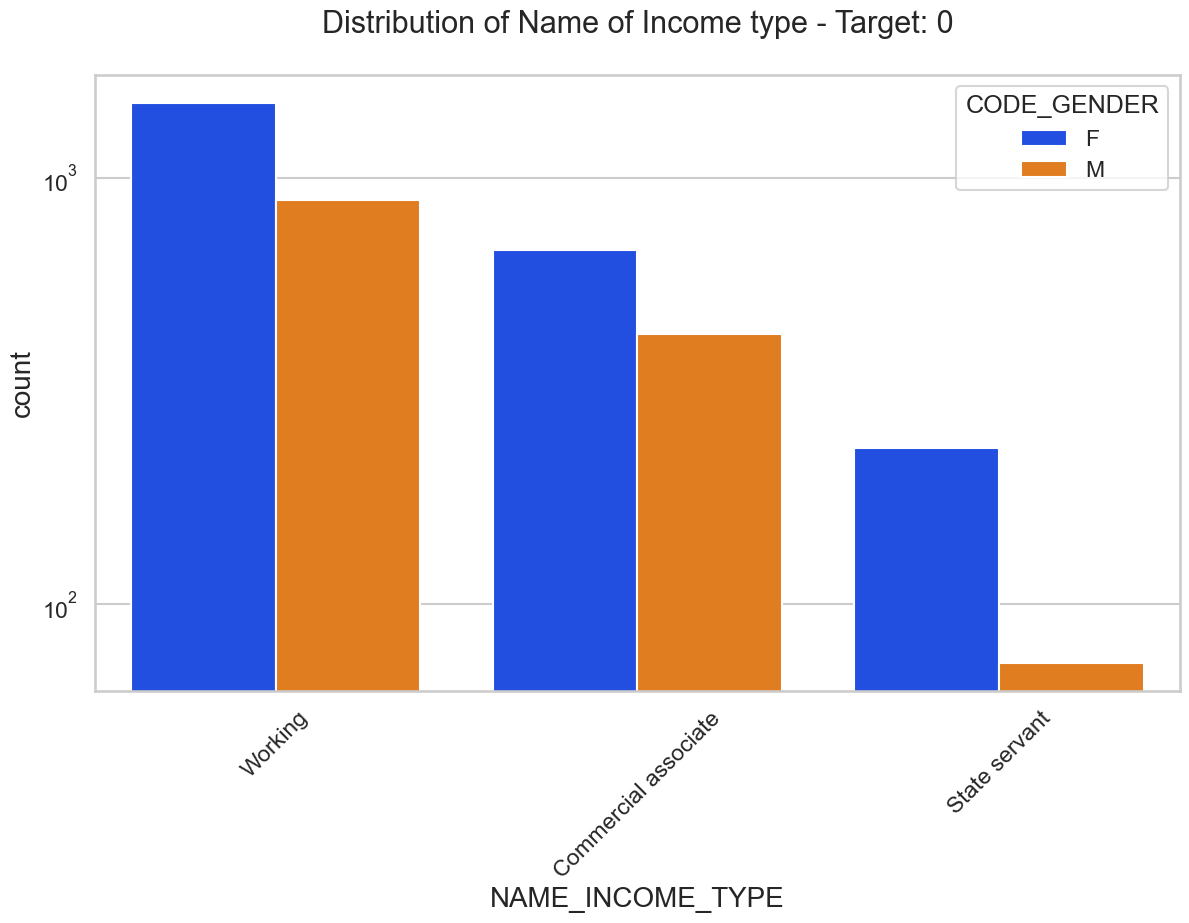

In [62]:
uniplot(target0_df_app,col='NAME_INCOME_TYPE',title='Distribution of Name of Income type - Target: 0',hue='CODE_GENDER')

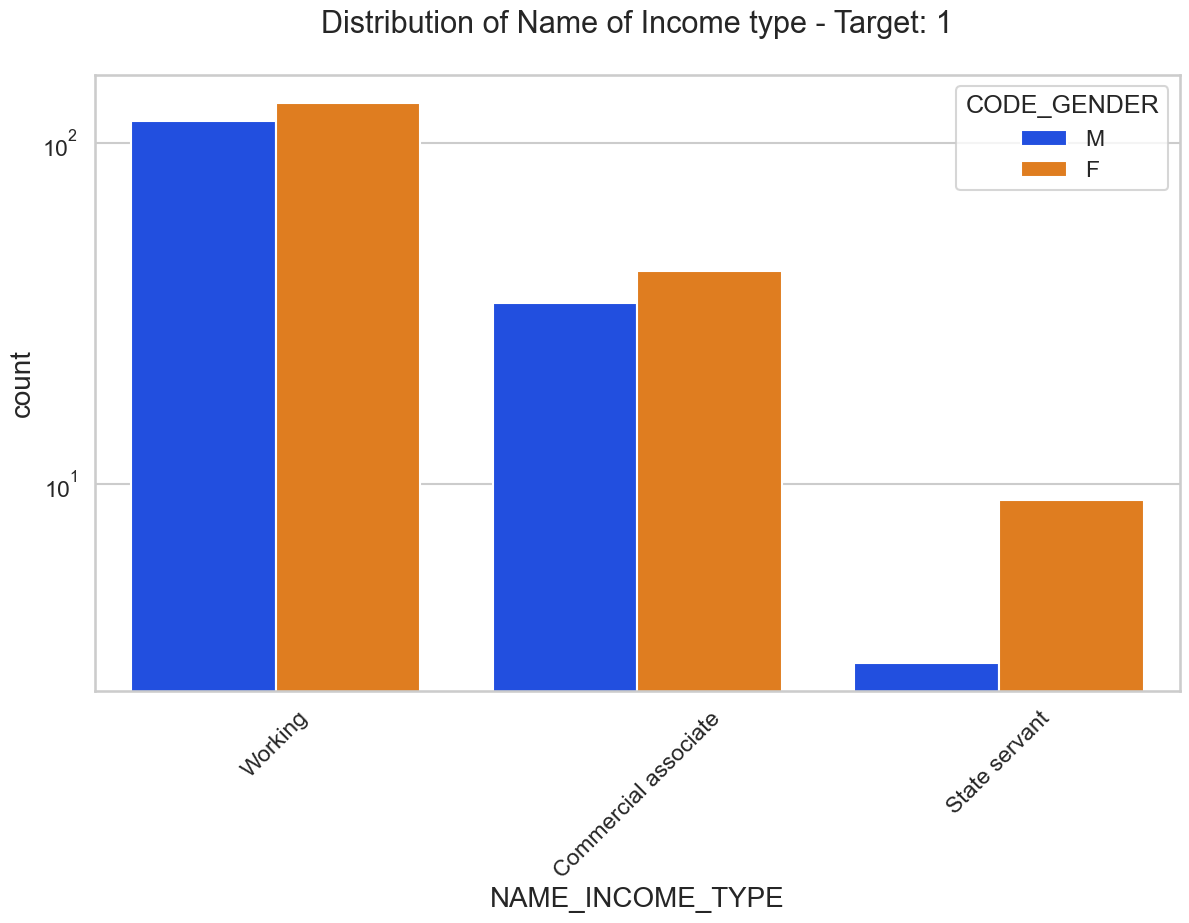

In [63]:
uniplot(target1_df_app,col='NAME_INCOME_TYPE',title='Distribution of Name of Income type - Target: 1',hue='CODE_GENDER')

<Axes: xlabel='CODE_GENDER', ylabel='NAME_INCOME_TYPE'>

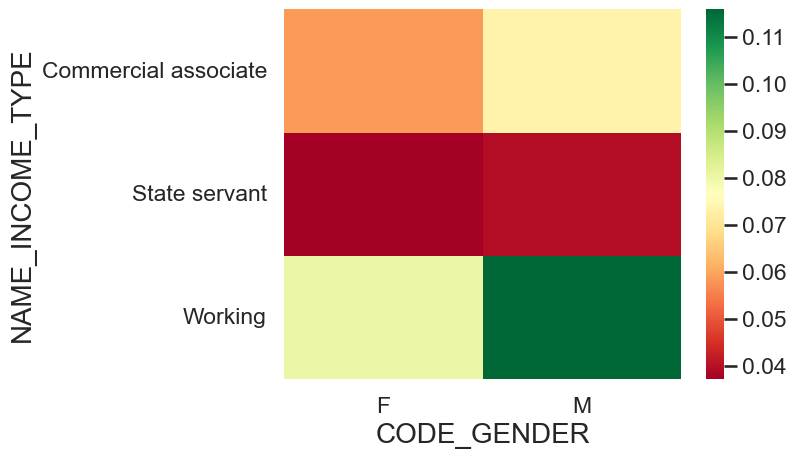

In [64]:
res = pd.pivot_table(data=df_app, index='NAME_INCOME_TYPE', columns='CODE_GENDER', values='TARGET')
sns.heatmap(res, annot=False, cmap="RdYlGn")

Points to be concluded from the above Gender vs Name Income Type Analysis against Target variable:

* For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
* For this Females are having more number of credits than male.
* For target value 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

Good insight: Females are having marginally higher default rate as compared to males, and most defaulters are working professionals, commercial associates, state servants etc. People with income type: Student, Pensioner, Businessman are not late payers.

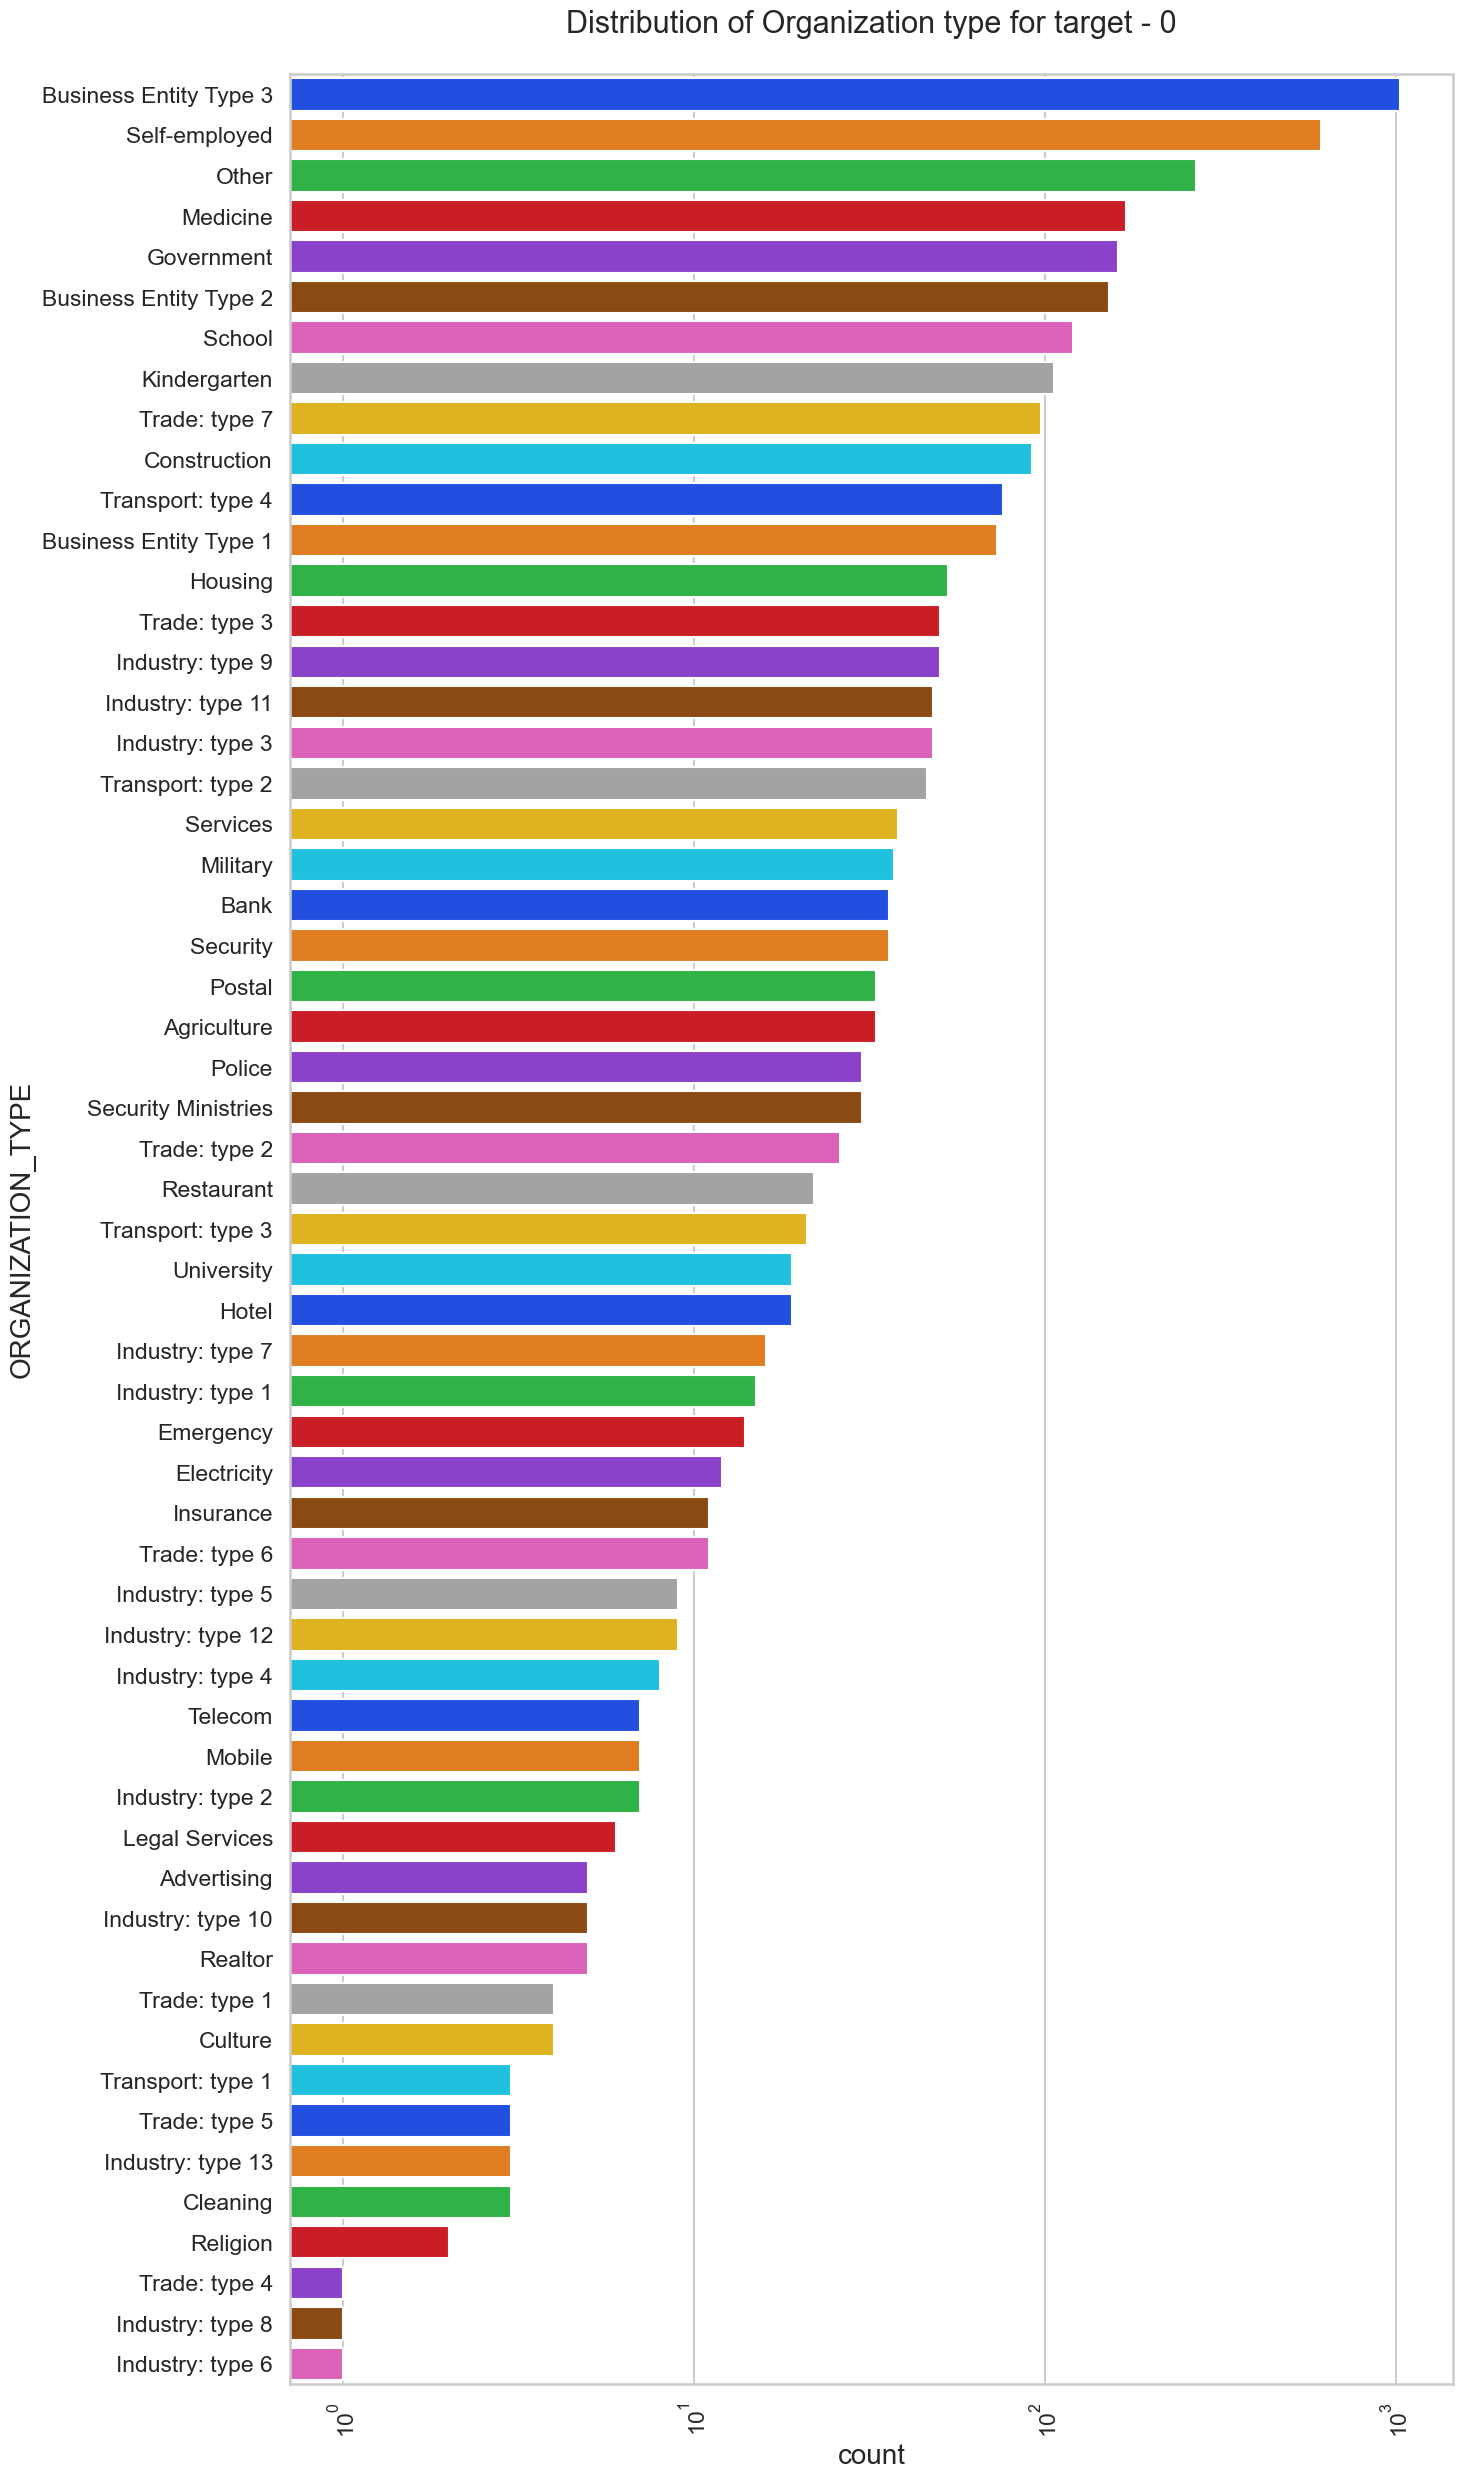

In [65]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df_app,y='ORGANIZATION_TYPE',order=target0_df_app['ORGANIZATION_TYPE'].value_counts().index,palette='bright')

plt.show()

Points to be concluded from the above graph.

* Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
* Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.


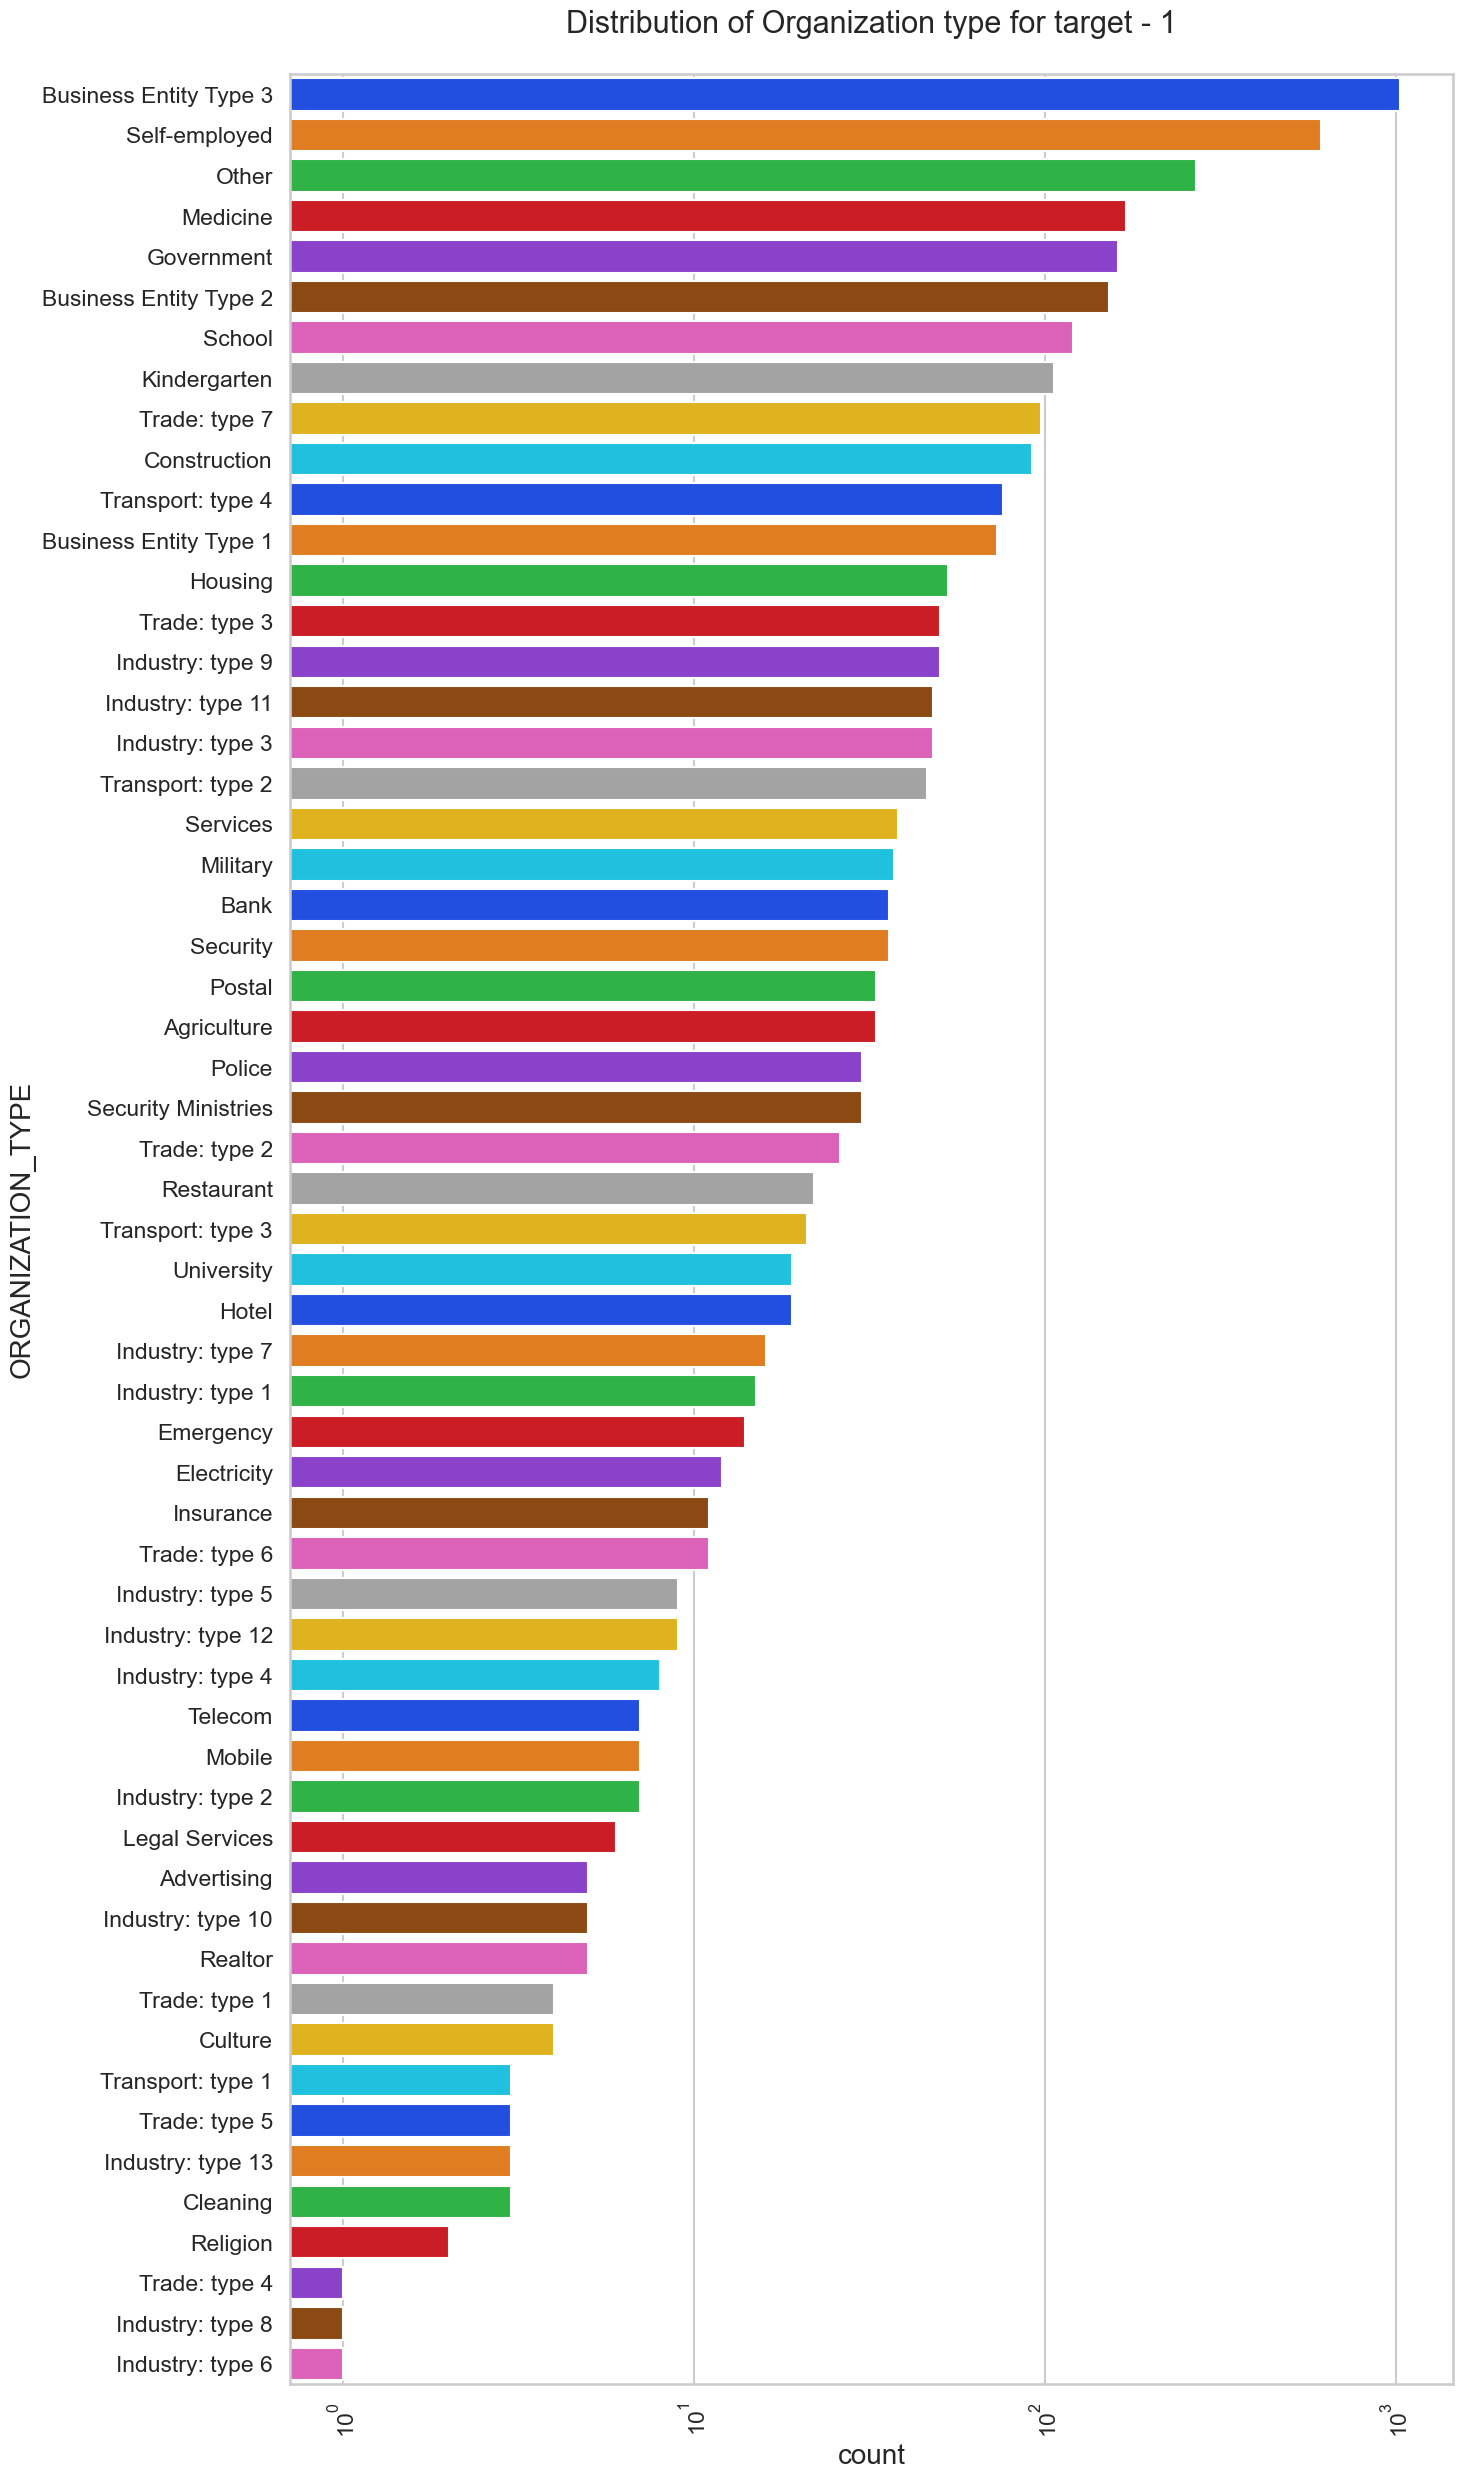

In [66]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df_app,y='ORGANIZATION_TYPE',order=target0_df_app['ORGANIZATION_TYPE'].value_counts().index,palette='bright')

plt.show()

Points to be concluded from the above graph.

* Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
* Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
* Same as type 0 in distribution of organization type.

In [67]:
numer= df_app.describe()
numerical= numer.columns
numer

SK_ID_CURR       TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count    4133.000000  4133.000000   4133.000000      4.133000e+03   
mean   102945.602226     0.081055      0.484394      1.755296e+05   
std      1718.619509     0.272952      0.750322      9.672080e+04   
min    100002.000000     0.000000      0.000000      2.565000e+04   
25%    101464.000000     0.000000      0.000000      1.125000e+05   
50%    102937.000000     0.000000      0.000000      1.575000e+05   
75%    104440.000000     0.000000      1.000000      2.146500e+05   
max    105898.000000     1.000000      7.000000      1.350000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  4.133000e+03    4133.000000     4.132000e+03   
mean   6.134500e+05   27876.920760     5.516850e+05   
std    4.039451e+05   14582.734076     3.708343e+05   
min    4.500000e+04    2844.000000     4.500000e+04   
25%    2.842560e+05   17019.000000     2.475000e+05   
50%    5.212800e+05   25960.500000     4.500000e+05   
75%    8.302140e+05   35694.000000     6.975000e+05   
max    2.517300e+06  135936.000000     2.254500e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                 4133.000000   4133.000000    4133.000000   
mean                     0.021070 -14756.105976   -2375.467215   
std                      0.014178   3615.352032    2310.365849   
min                      0.000938 -25007.000000  -15632.000000   
25%                      0.010006 -17547.000000   -3165.000000   
50%                      0.018850 -14653.000000   -1658.000000   
75%                      0.028663 -11848.000000    -750.000000   
max                      0.072508  -7705.000000     -17.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count        4133.000000      4133.000000  1531.000000   
mean        -4607.257440     -2767.757319    11.484651   
std          3233.842334      1531.739901    11.461398   
min        -20981.000000     -6228.000000     0.000000   
25%         -6902.000000     -4188.000000     5.000000   
50%         -4289.000000     -2792.000000     9.000000   
75%         -1807.000000     -1443.000000    15.000000   
max             0.000000         0.000000    65.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count              4133.000000                 4133.000000   
mean                 12.196709                    0.021776   
std                   3.266446                    0.145969   
min                   1.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  15.000000                    0.000000   
max                  22.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                 4133.000000                  4133.000000   
mean                     0.061457                     0.046213   
std                      0.240195                     0.209972   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count             4133.000000             4133.000000   
mean                 0.098718                0.291072   
std                  0.298319                0.454312   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                1.000000   
max                  1.000000                1.000000   

       LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
count              4133.000000  

In [68]:
numer.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [69]:
(df_app['DAYS_BIRTH'] / -365).describe()

count    4133.000000
mean       40.427688
std         9.905074
min        21.109589
25%        32.460274
50%        40.145205
75%        48.073973
max        68.512329
Name: DAYS_BIRTH, dtype: float64

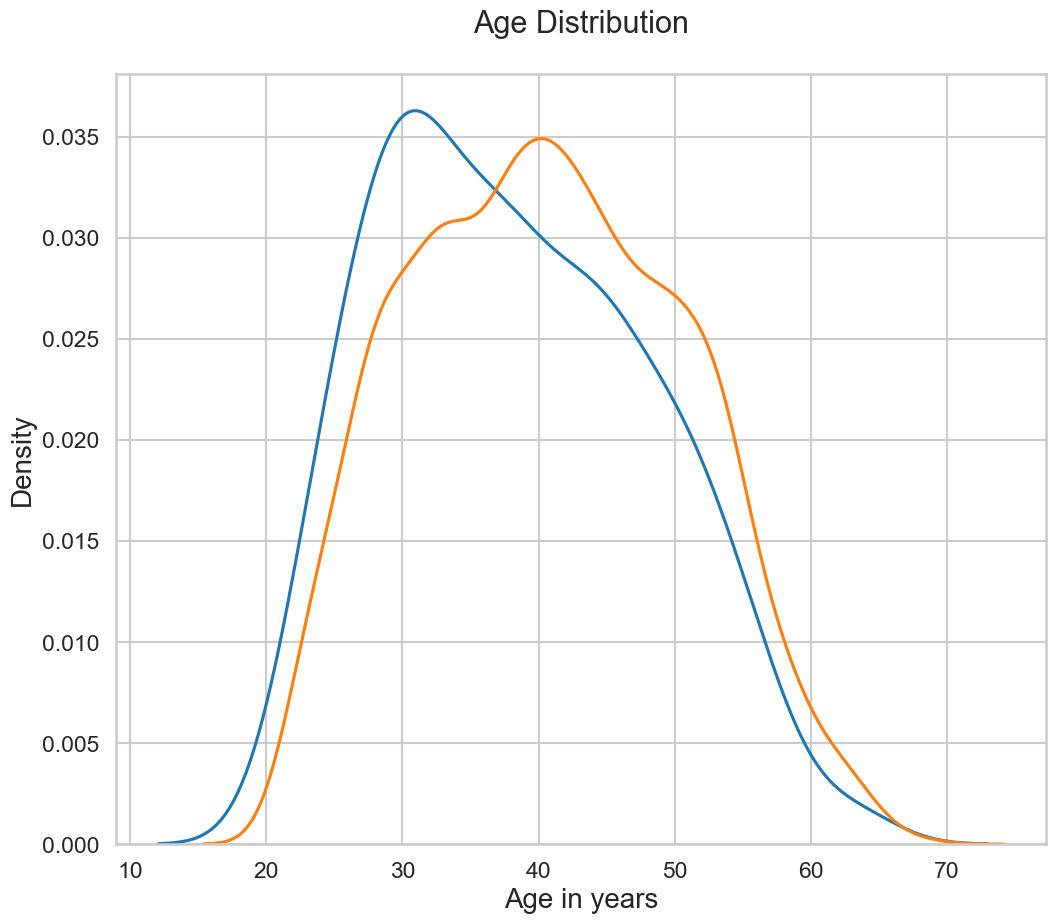

In [70]:
plt.figure(figsize = (12, 10))

sns.kdeplot(df_app.loc[df_app['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'Loan repayed(0)')
sns.kdeplot(df_app.loc[df_app['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'Loan not repayed(1)')
plt.xlabel('Age in years'); 
plt.ylabel('Density'); 
plt.title('Age Distribution');

In [71]:
df_app['DAYS_BIRTH'] = abs(df_app['DAYS_BIRTH'])
df_app['DAYS_BIRTH'].corr(df_app['TARGET'])

-0.06656922807090117

* As clients get older, they tend to repay their loans on time more often.
* Younger clients are less reliable than older clients.
* Even though the correlation (-0.065) is less significant, it does affect the target.

In [72]:
age_data = df_app[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
age_data['AGE_RANGE'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

age_data = age_data.groupby('AGE_RANGE').mean()
age_data

TARGET    DAYS_BIRTH  YEARS_BIRTH
AGE_RANGE                                        
(20.0, 25.0]  0.131068   8520.150485    23.342878
(25.0, 30.0]  0.100760  10131.038023    27.756269
(30.0, 35.0]  0.097331  11877.896389    32.542182
(35.0, 40.0]  0.082232  13730.654919    37.618233
(40.0, 45.0]  0.067153  15487.982482    42.432829
(45.0, 50.0]  0.070085  17320.415385    47.453193
(50.0, 55.0]  0.065637  19141.322394    52.441979
(55.0, 60.0]  0.057143  20881.438095    57.209419
(60.0, 65.0]  0.050633  22752.291139    62.335044
(65.0, 70.0]  0.000000  24444.000000    66.969863

We bin age into ranges of 5 years and examine trend for each target.

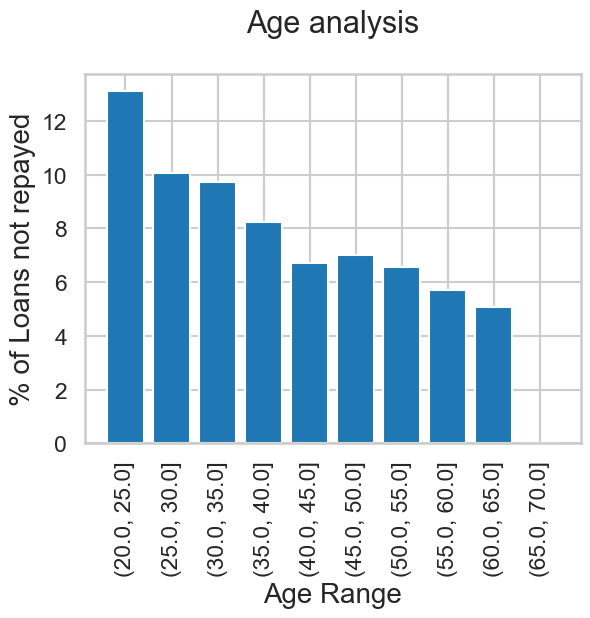

In [73]:
plt.bar(age_data.index.astype(str), 100 * age_data['TARGET'])

plt.xticks(rotation = 90); plt.xlabel('Age Range'); plt.ylabel('% of Loans not repayed')
plt.title('Age analysis');

* This graph is consistent with our analysis above. Young people have 12% default rate while the oldest have only ~4%.
* Maybe young clients can be given extra guidance for financial planning to help reduce this default rate.

In [74]:
def plot_numerical(feature):
    plt.figure(figsize=(10,6))
    plt.title("%s Distribution" % feature)
    sns.distplot(df_app[feature].dropna(), kde=True)
    plt.show()   

### Family Features

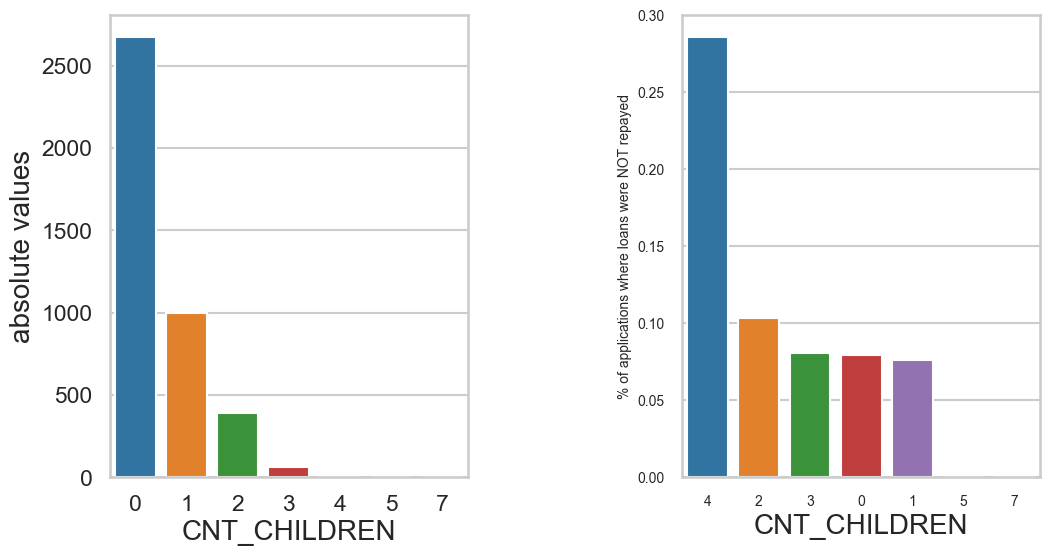

In [75]:
plot_features('CNT_CHILDREN')

* Most clients have no or very few children and are likely to repay loan on time.
* Clients with very high number of children are risky.

In one of my earlier steps, I had removed CNT_FAM_MEMBERS thinking it to be useless, re-adding it back to our dataframe for an analysis.
Various other numerical columns with high null values were also added back and analysed in the numerical analysis part, but few columns provided good insights, hence adding these columns to the dataframe again so that we can show the analysis in the numerical section.

In [76]:
df_app_again = pd.read_csv('application_data.csv')

In [77]:
df_app['CNT_FAM_MEMBERS'] = df_app_again['CNT_FAM_MEMBERS']
df_app['EXT_SOURCE_1'] = df_app_again['EXT_SOURCE_1']
df_app['EXT_SOURCE_2'] = df_app_again['EXT_SOURCE_2']
df_app['EXT_SOURCE_3'] = df_app_again['EXT_SOURCE_3']
df_app['FLAG_EMP_PHONE'] = df_app_again['FLAG_EMP_PHONE']

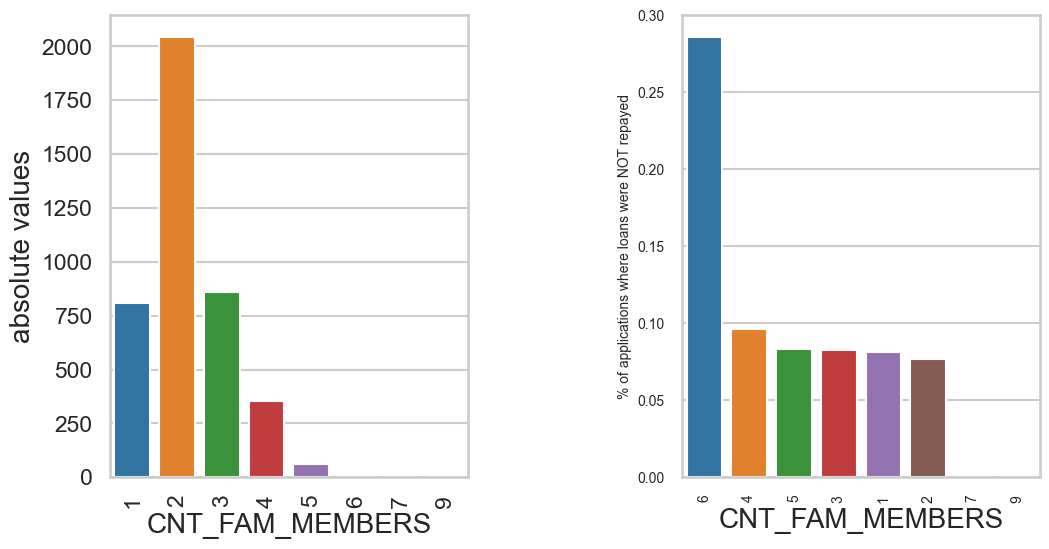

In [78]:
plot_features('CNT_FAM_MEMBERS',True)

* Nuclear families are in majority and more reliable.
* Clients in a joint family of 8-13 members are most likely to default.

### Amount features

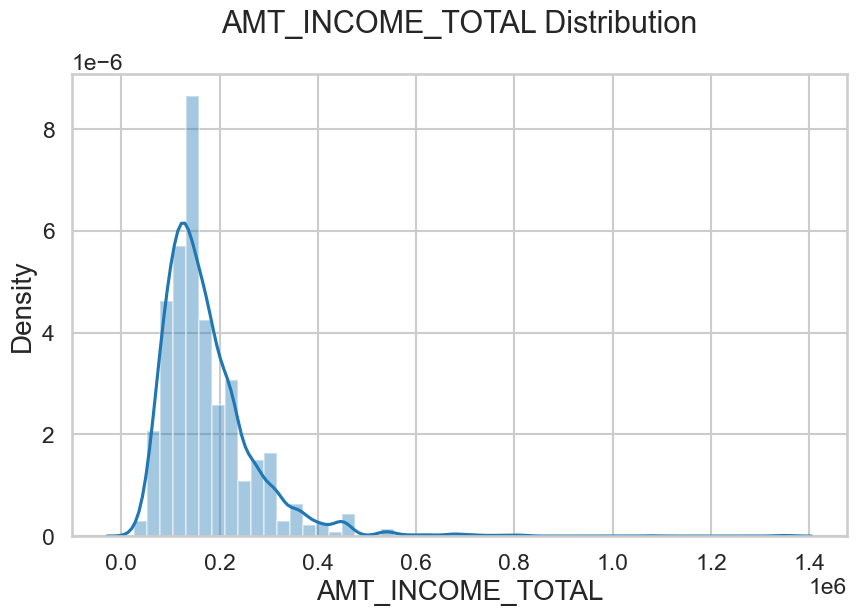

In [79]:
plot_numerical('AMT_INCOME_TOTAL')

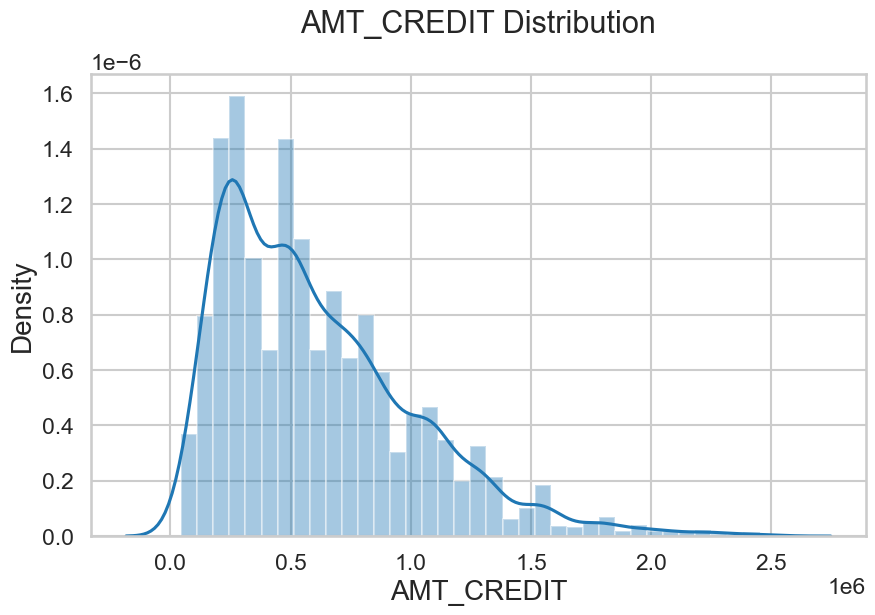

In [80]:
plot_numerical('AMT_CREDIT')

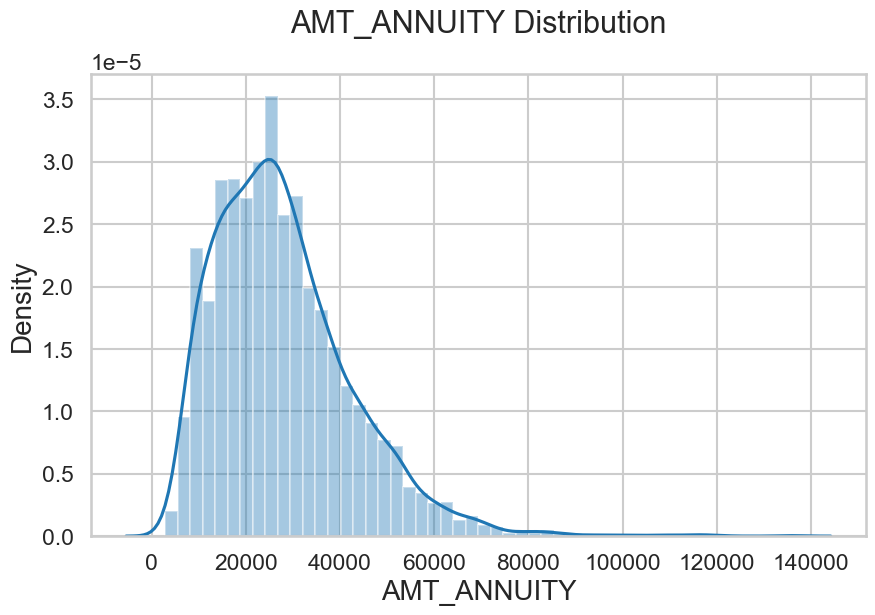

In [81]:
plot_numerical('AMT_ANNUITY')

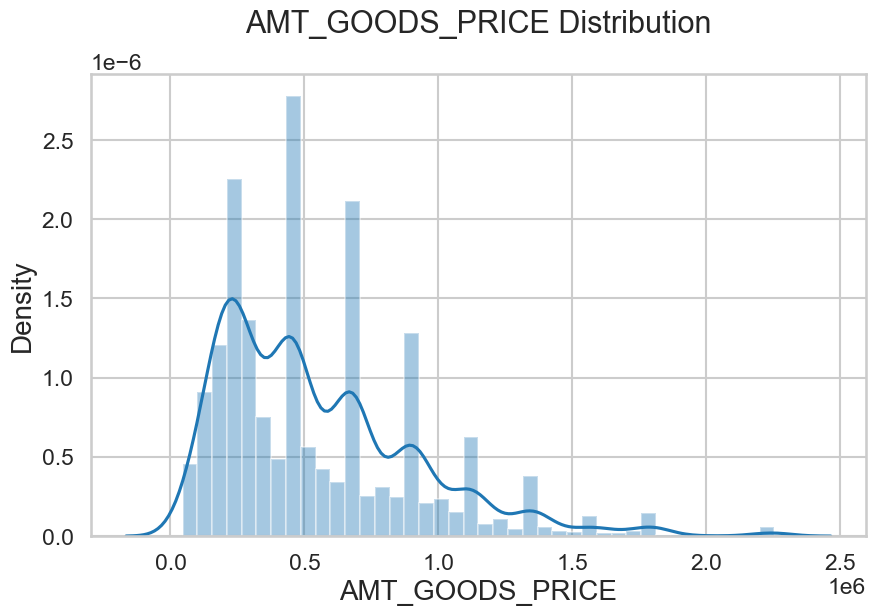

In [82]:
plot_numerical('AMT_GOODS_PRICE')

### Others

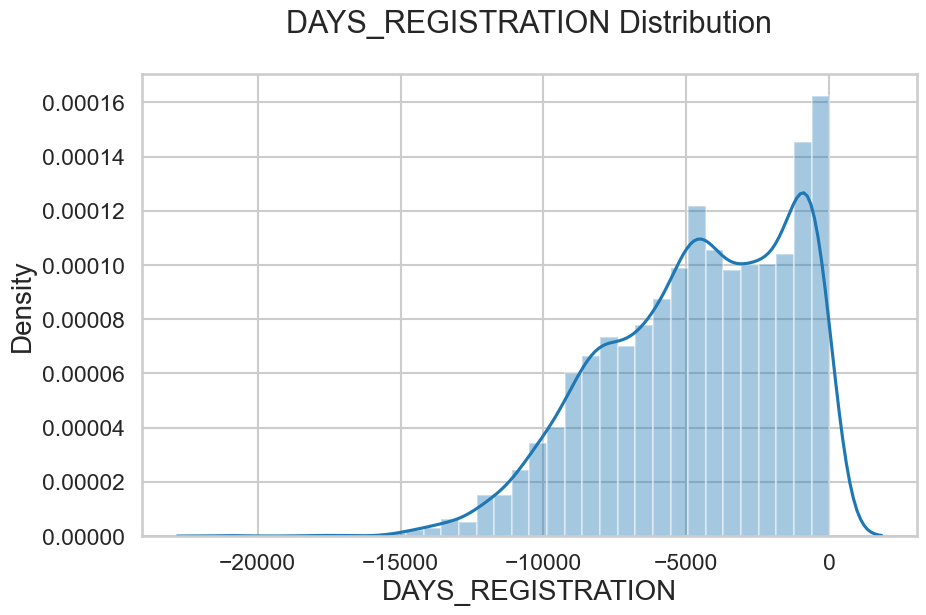

In [83]:
plot_numerical('DAYS_REGISTRATION')

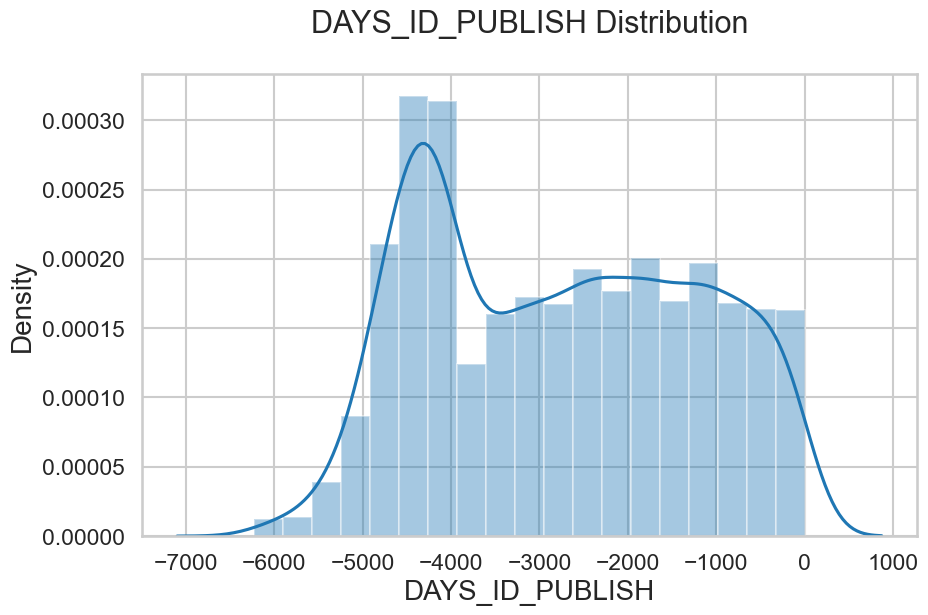

In [84]:
plot_numerical('DAYS_ID_PUBLISH')

* There is no useful insight from distribution of income and other feature values.
* Segmented analysis can be tried to get better understanding.

### Some segmented analysis

In [85]:
def plot_comparisons(features):

    t_1 = df_app.loc[df_app['TARGET'] == 1]
    t_0 = df_app.loc[df_app['TARGET'] == 0]
    i=0
    for feature in features:
        plt.figure(figsize=(12,6))
        i += 1
        sns.kdeplot(t_0[feature], bw=0.5,label="Loans repayed")
        sns.kdeplot(t_1[feature], bw=0.5,label="Loans not repayed")
        plt.ylabel('Density')
        plt.xlabel(feature)
        _, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

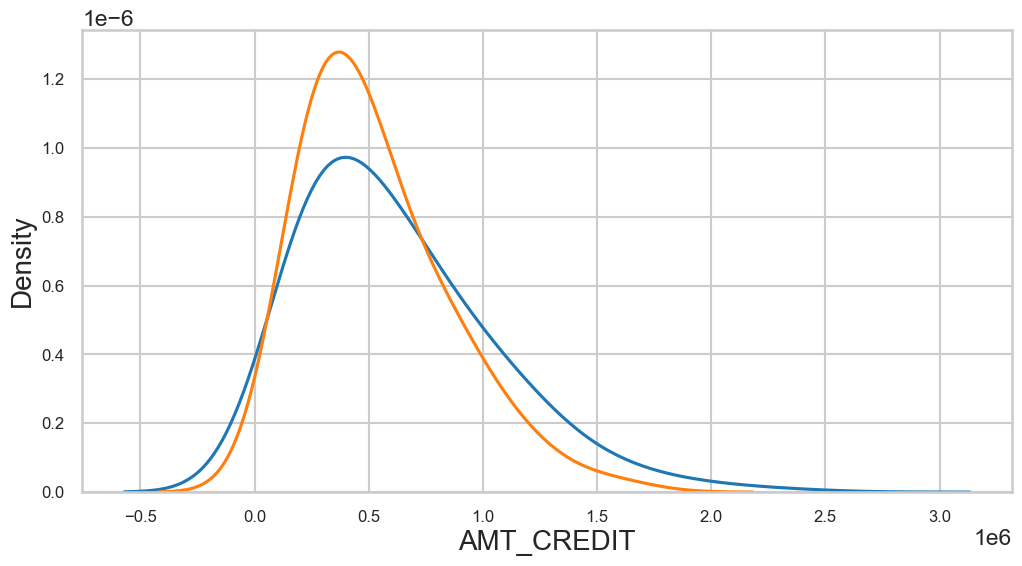

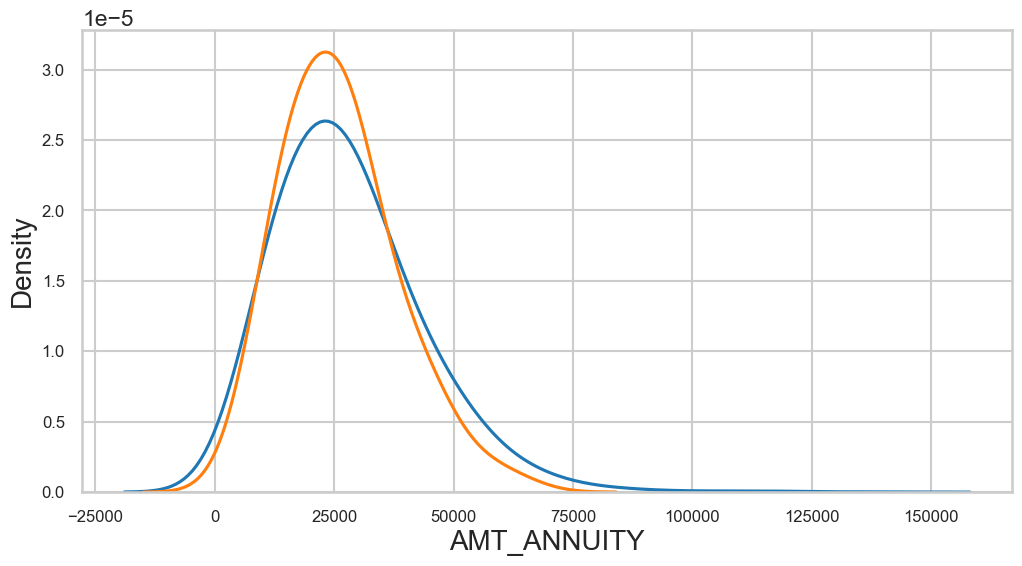

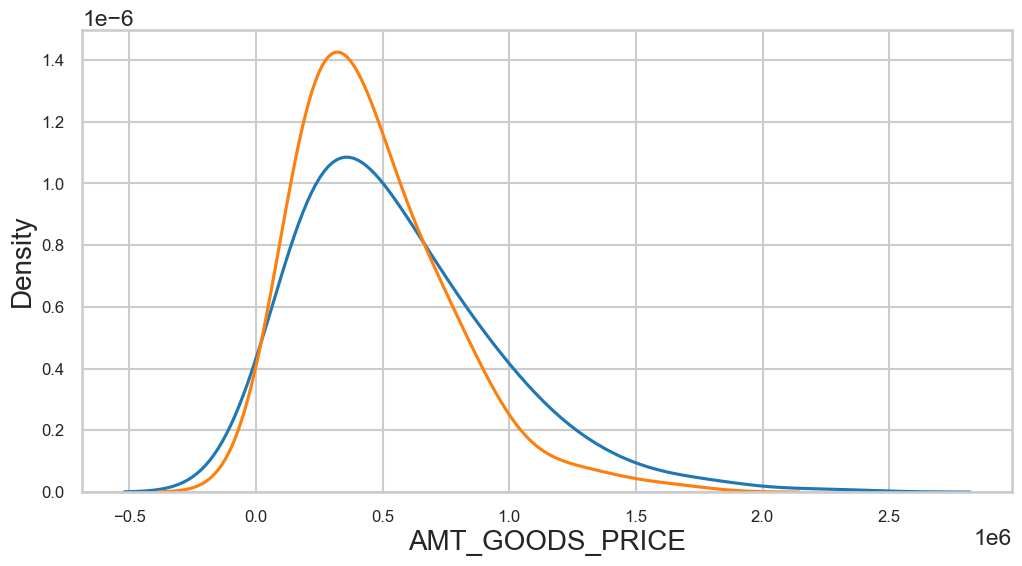

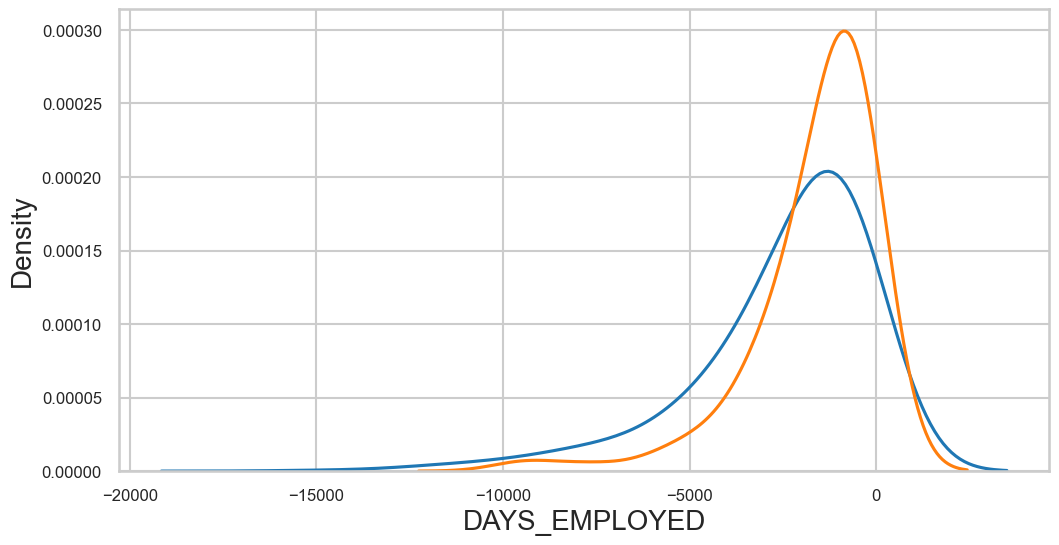

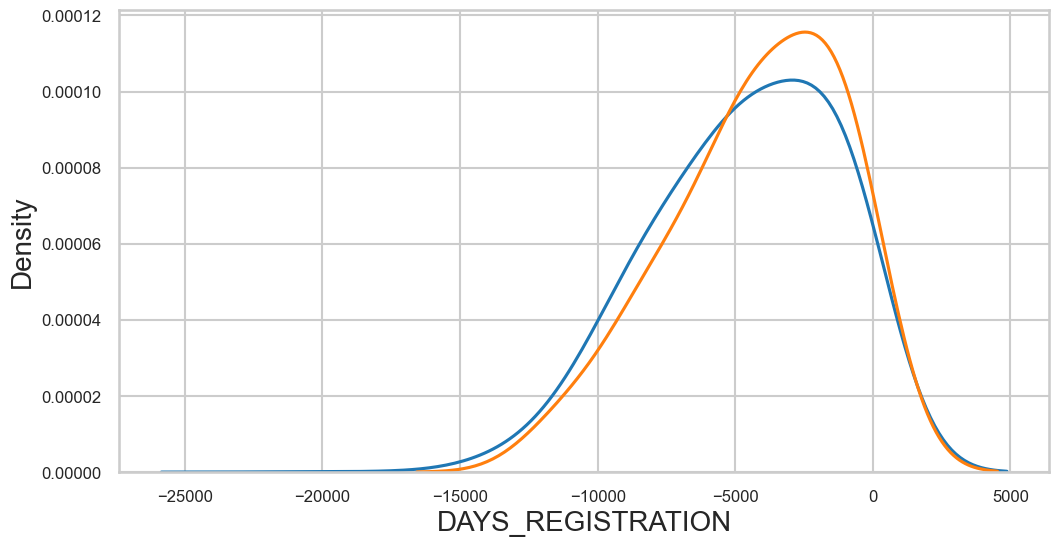

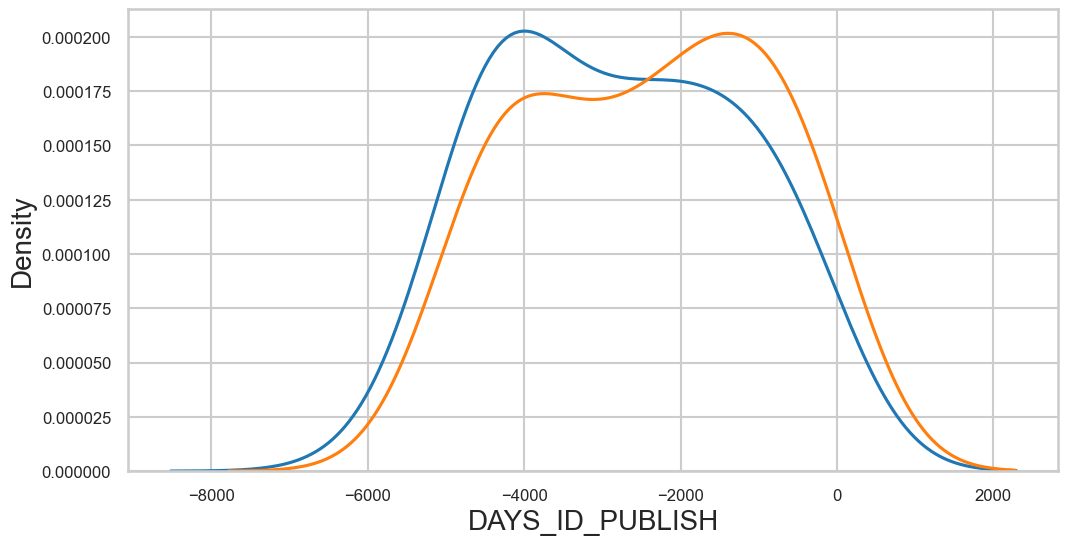

In [86]:
feat = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']
plot_comparisons(feat)

* When clients change their registration closer to application date, they are more likely to default.
* Clients who change their identity documents closer to loan application are less reliable than those who change it well in advance.

### Correlations

In [87]:
app_data_enc = pd.get_dummies(df_app, drop_first=True)

In [88]:
app_data_enc

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0         100002       1             0          202500.0    406597.5   
1         100003       0             0          270000.0   1293502.5   
2         100004       0             0           67500.0    135000.0   
3         100006       0             0          135000.0    312682.5   
4         100007       0             0          121500.0    513000.0   
...          ...     ...           ...               ...         ...   
5041      105893       0             1           90000.0    270000.0   
5043      105895       0             2          202500.0    584766.0   
5044      105896       0             0          112500.0    609898.5   
5045      105897       0             0          112500.0    269550.0   
5046      105898       0             0          135000.0    225000.0   

      AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0         24700.5         351000.0                    0.018801        9461   
1         35698.5        1129500.0                    0.003541       16765   
2          6750.0         135000.0                    0.010032       19046   
3         29686.5         297000.0                    0.008019       19005   
4         21865.5         513000.0                    0.028663       19932   
...           ...              ...                         ...         ...   
5041      13500.0         270000.0                    0.028663       12501   
5043      27225.0         472500.0                    0.031329       12910   
5044      39105.0         526500.0                    0.010556       20989   
5045      11547.0         225000.0                    0.007020       15297   
5046      16303.5         225000.0                    0.018850       12532   

      DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0              -637              -3648            -2120          NaN   
1             -1188              -1186             -291          NaN   
2              -225              -4260            -2531         26.0   
3             -3039              -9833            -2437          NaN   
4             -3038              -4311            -3458          NaN   
...             ...                ...              ...          ...   
5041           -491               -668            -4259          NaN   
5043          -3009              -1421            -5175          9.0   
5044          -3609             -10121            -4515         22.0   
5045           -733              -1961            -4516          NaN   
5046          -1572              -5151            -1713          NaN   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                          10                           0   
1                          11                           0   
2                           9                           0   
3                          17                           0   
4                          11                           0   
...                       ...                         ...   
5041                       13                           0   
5043                        8                           0   
5044                       10                           0   
5045                       10                           0   
5046                        9                           0   

      REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   
...                          ...                          ...   
5041                           0                            0   
5043                           0                            0   
5044                 

In [89]:
correlations = df_app.corr()['TARGET'].sort_values()
print('Top 10 Positive Correlations:\n', correlations.tail(10))
print('\nTop 10 Negative Correlations:\n', correlations.head(10))

Top 10 Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY     0.024105
REG_CITY_NOT_LIVE_CITY      0.026540
DAYS_REGISTRATION           0.036431
REG_CITY_NOT_WORK_CITY      0.038039
DEF_60_CNT_SOCIAL_CIRCLE    0.065263
DAYS_ID_PUBLISH             0.068006
DEF_30_CNT_SOCIAL_CIRCLE    0.073329
DAYS_EMPLOYED               0.097659
TARGET                      1.000000
FLAG_EMP_PHONE                   NaN
Name: TARGET, dtype: float64

Top 10 Negative Correlations:
 EXT_SOURCE_3                 -0.219200
EXT_SOURCE_2                 -0.182932
EXT_SOURCE_1                 -0.157857
AMT_GOODS_PRICE              -0.068254
DAYS_BIRTH                   -0.066569
AMT_CREDIT                   -0.061402
REGION_POPULATION_RELATIVE   -0.041948
AMT_ANNUITY                  -0.036316
HOUR_APPR_PROCESS_START      -0.030374
AMT_INCOME_TOTAL             -0.029414
Name: TARGET, dtype: float64


* External sources have highest correlation value with the target.
* These features represent a "normalized score from external data source".

### External Source

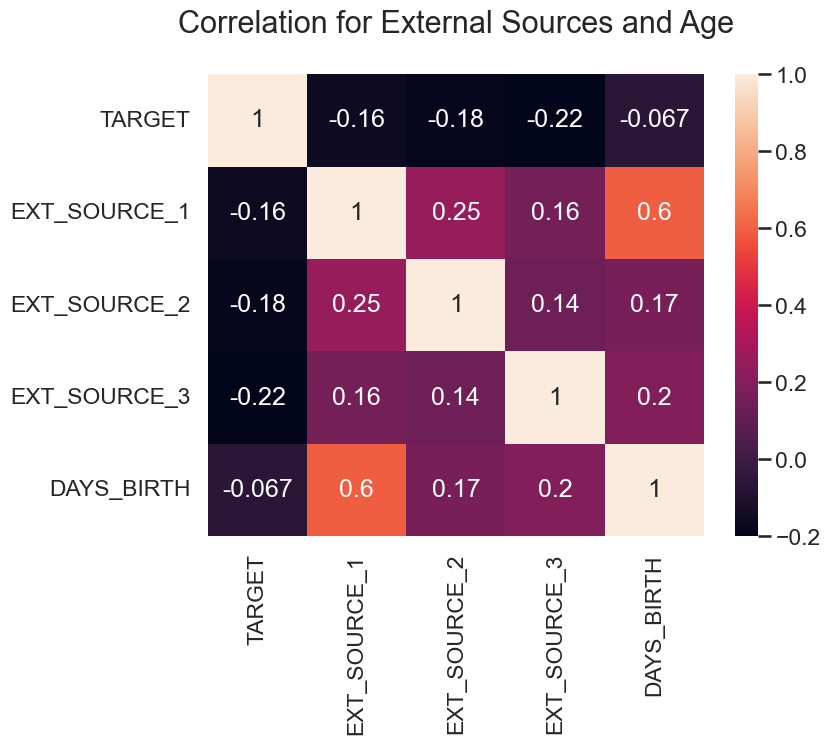

In [90]:
df_app['DAYS_BIRTH']
ext_sc = df_app[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_sc_corrs = ext_sc.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(ext_sc_corrs, vmin = -0.2, annot = True)
plt.title('Correlation for External Sources and Age');

* All three external sources have negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan.
* DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe this external source takes into account the client's age.

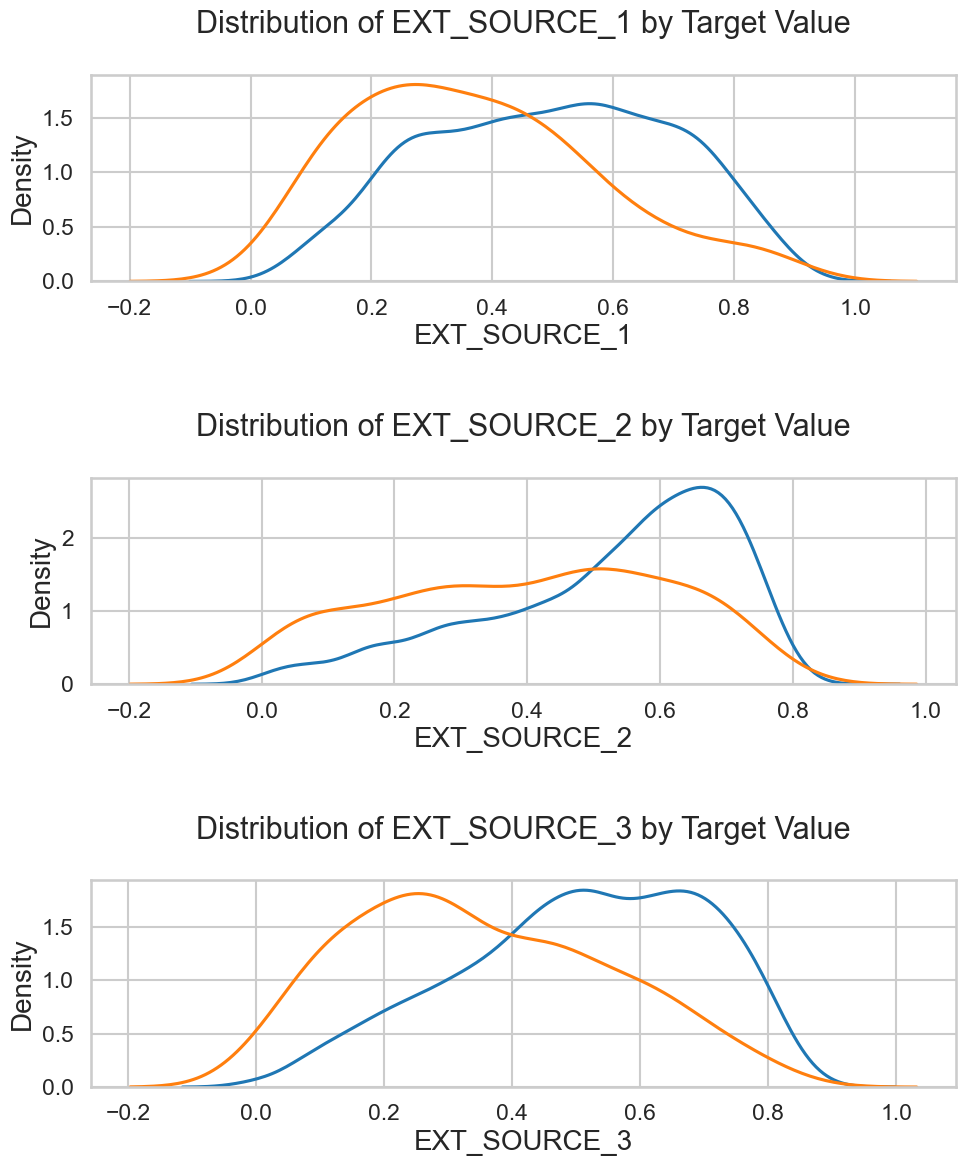

In [91]:
plt.figure(figsize = (10, 12))

externals= ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for i, source in enumerate(externals):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(df_app.loc[df_app['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(df_app.loc[df_app['TARGET'] == 1, source], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

* EXT_SOURCE_1 shows a similar distribution to the age of the client, which validates the positive correlation
* EXT_SOURCE_3 displays greatest difference between the values of the target so it can be a determining factor.

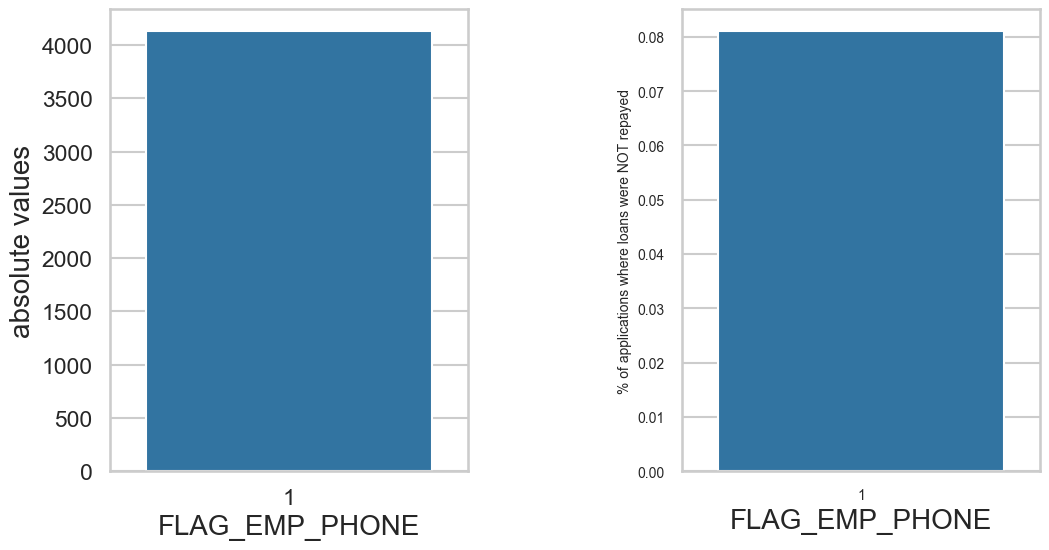

In [92]:
plot_features('FLAG_EMP_PHONE')

Many people who provide their work phone are defaulting more than those who don't.

### Previous application

In [93]:
prev_data= pd.read_csv('previous_application.csv')
prev_data

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0        2030495      271877     Consumer loans     1730.430          17145.0   
1        2802425      108129         Cash loans    25188.615         607500.0   
2        2523466      122040         Cash loans    15060.735         112500.0   
3        2819243      176158         Cash loans    47041.335         450000.0   
4        1784265      202054         Cash loans    31924.395         337500.0   
...          ...         ...                ...          ...              ...   
4994     2171217      210619         Cash loans          NaN              0.0   
4995     1702352      423105         Cash loans          NaN              0.0   
4996     2167810      416510         Cash loans    40002.975         675000.0   
4997     1576124      384903     Consumer loans          NaN              0.0   
4998     1209285      103734         Cash loans    11557.395         112500.0   

      AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0        17145.0               0.0          17145.0   
1       679671.0               NaN         607500.0   
2       136444.5               NaN         112500.0   
3       470790.0               NaN         450000.0   
4       404055.0               NaN         337500.0   
...          ...               ...              ...   
4994         0.0               NaN              NaN   
4995         0.0               NaN              NaN   
4996    767664.0               NaN         675000.0   
4997         0.0               NaN              NaN   
4998    168912.0               NaN         112500.0   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                      SATURDAY                       15   
1                      THURSDAY                       11   
2                       TUESDAY                       11   
3                        MONDAY                        7   
4                      THURSDAY                        9   
...                         ...                      ...   
4994                   THURSDAY                       16   
4995                     FRIDAY                       15   
4996                   SATURDAY                       12   
4997                     SUNDAY                       12   
4998                   SATURDAY                       13   

     FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                              Y                       1                0.0   
1                              Y                       1                NaN   
2                              Y                       1                NaN   
3                              Y                       1                NaN   
4                              Y                       1                NaN   
...                          ...                     ...                ...   
4994                           Y                       1                NaN   
4995                           Y                       1                NaN   
4996                           Y                       1                NaN   
4997                           Y                       1                NaN   
4998                           Y                       1                NaN   

      RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
0                  0.182832                  0.867336                    XAP   
1                       NaN                       NaN                    XNA   
2                       NaN                       NaN                    XNA   
3                       NaN                       NaN                    XNA   
4                       NaN                       NaN                Repairs   
...                     ...                       ...                    ...   
4994                    NaN                       NaN                    XNA   
4995                    NaN                       NaN         

In [94]:
# many applicants have applied for multiple loans in the past

len(set(prev_data['SK_ID_CURR']))

4899

### Current clients having previous loan applications

SK_ID_PREV: ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit).
SK_ID_CURR: ID of loan in our sample.

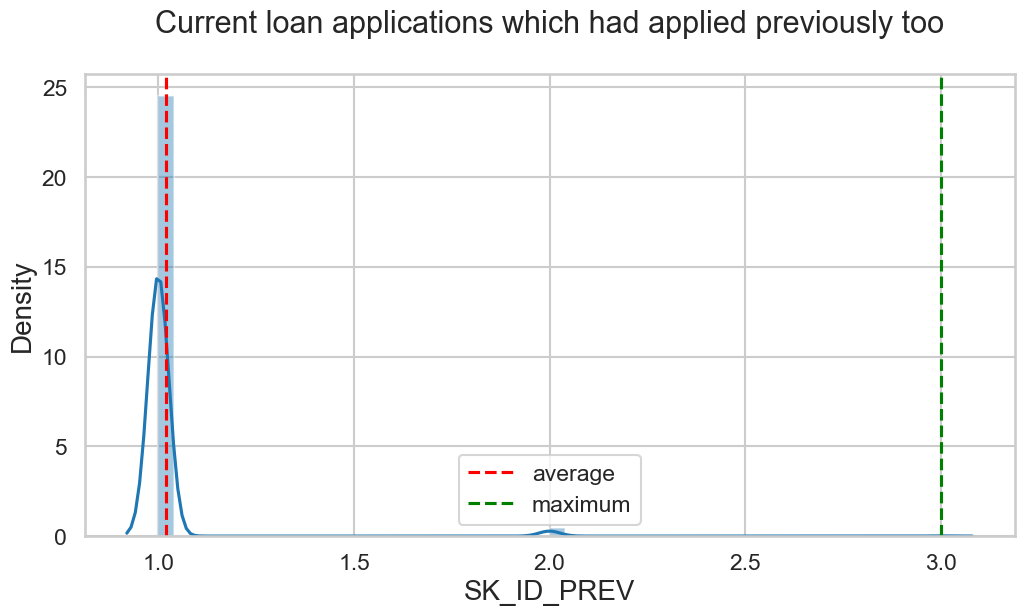

In [95]:
x = prev_data.groupby('SK_ID_CURR')['SK_ID_PREV'].count().reset_index()
plt.figure(figsize=(12,6))
ax = sns.distplot(x["SK_ID_PREV"])
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan applications which had applied previously too")
plt.show()

* Current loan ids have 4 to 5 loan applications previously on average
* Maximum is above 75 (outlier-can be removed)

### Contract status

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

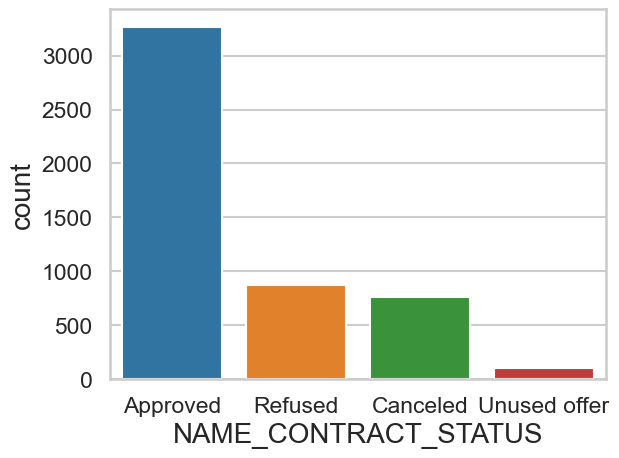

In [96]:
sns.countplot(data=prev_data, x='NAME_CONTRACT_STATUS')

In [97]:
100*prev_data['NAME_CONTRACT_STATUS'].value_counts()/len(prev_data['NAME_CONTRACT_STATUS'])

Approved        65.313063
Refused         17.463493
Canceled        15.223045
Unused offer     2.000400
Name: NAME_CONTRACT_STATUS, dtype: float64

Most applications were approved, and very few were unused in the past.

### Application status by application type

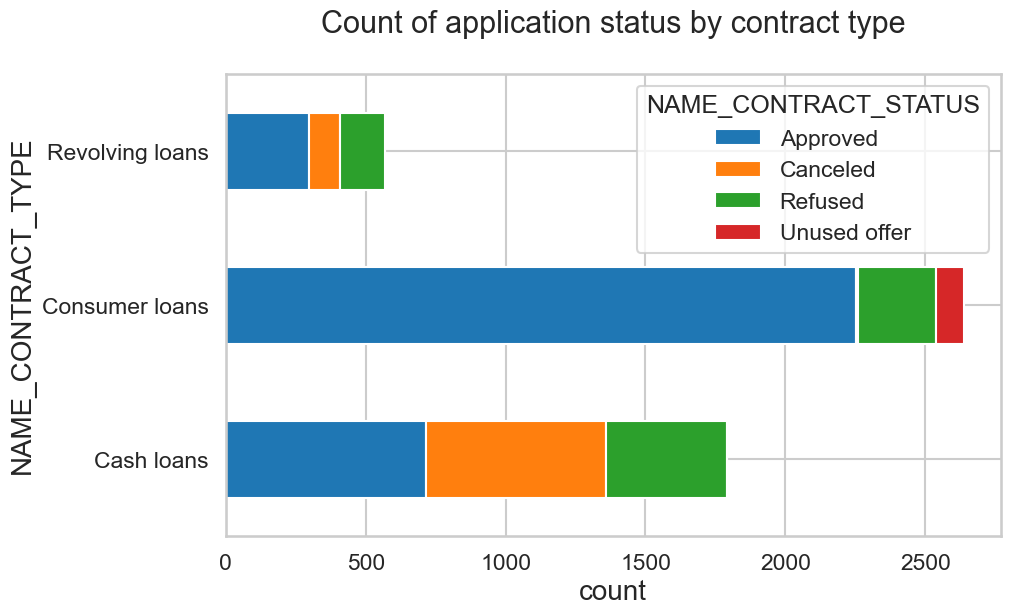

In [98]:
relation= pd.crosstab(prev_data['NAME_CONTRACT_TYPE'],prev_data['NAME_CONTRACT_STATUS'])
ax = relation.plot(kind="barh",figsize=(10,6),stacked=True)
plt.xticks(rotation=0)
plt.xlabel("count")
plt.title("Count of application status by contract type")
plt.show()

* Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.
* Consumer loans also rarely cancel, they are the most reliable type.

### Contract status by hour of the day
HOUR_APPR_PROCESS_START - Approximately at what day hour did the client apply for the previous application.



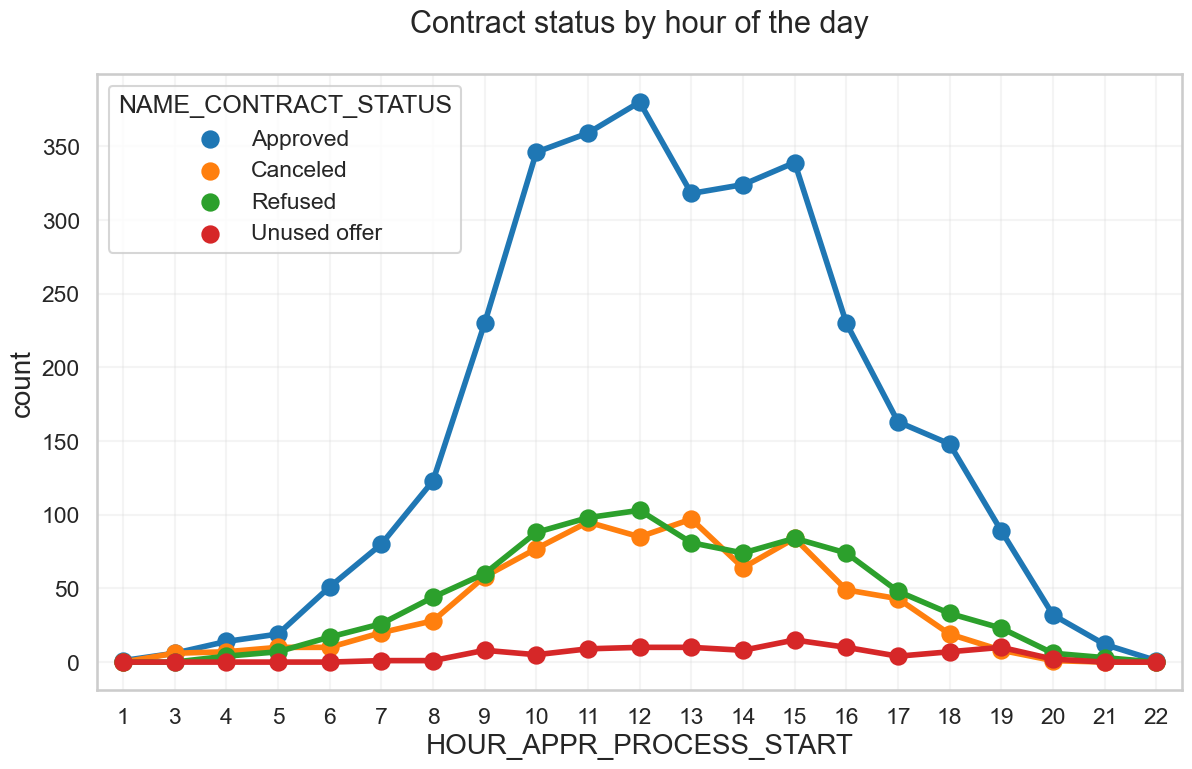

In [99]:
relation = pd.crosstab(prev_data["HOUR_APPR_PROCESS_START"],prev_data["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(14,8))
ax = sns.pointplot(relation["HOUR_APPR_PROCESS_START"],relation[0],hue=relation["NAME_CONTRACT_STATUS"],scale=1)
ax.set_ylabel("count")
ax.set_title("Contract status by hour of the day")
plt.grid(True,alpha=.2)

* Maximum approvals around 11 AM.
* Maximum refused and cancelled contracts start application at 10 AM.

### Percentage of applications accepted,cancelled,refused and unused for different loan purposes

In [100]:
purpose = pd.crosstab(prev_data["NAME_CASH_LOAN_PURPOSE"],prev_data["NAME_CONTRACT_STATUS"])
total= purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"]
purpose["% approved"] = purpose["Approved"]*100/total
purpose["% cancelled"] = purpose["Canceled"]*100/total
purpose["% refused"] = purpose["Refused"]*100/total
purpose["% unused"] = purpose["Unused offer"]*100/total
purpose= purpose[['% approved', '% cancelled', '% refused', '% unused']]
purpose = purpose.stack().reset_index()

purpose

NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS           0
0   Building a house or an annex           % approved    0.000000
1   Building a house or an annex          % cancelled    0.000000
2   Building a house or an annex            % refused  100.000000
3   Building a house or an annex             % unused    0.000000
4                Buying a garage           % approved    0.000000
..                           ...                  ...         ...
71                           XAP             % unused    3.087960
72                           XNA           % approved   40.722291
73                           XNA          % cancelled   40.037360
74                           XNA            % refused   19.178082
75                           XNA             % unused    0.062267

[76 rows x 3 columns]

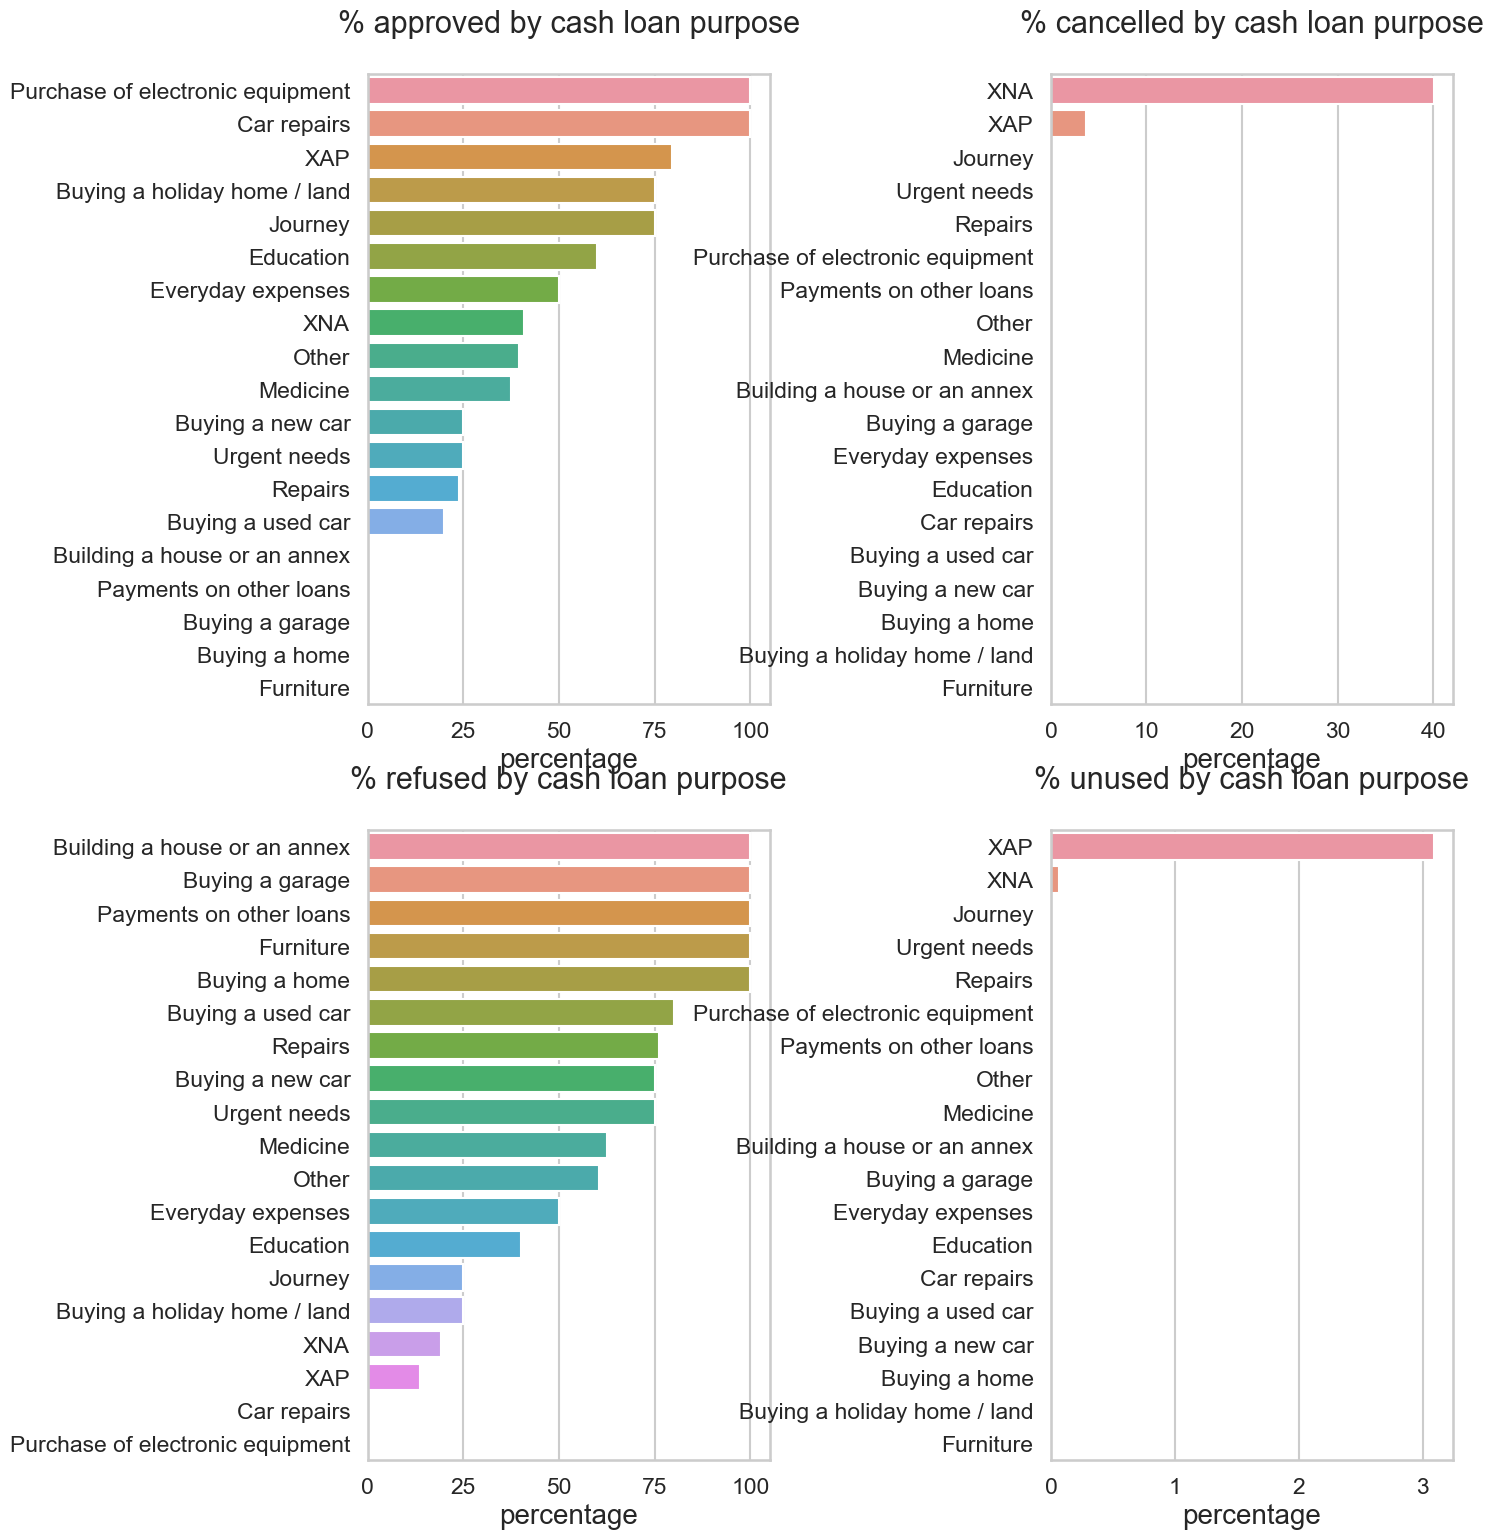

In [101]:
status = purpose["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(status)
import itertools
fig = plt.figure(figsize=(14,18))
for stat,l in itertools.zip_longest(status,range(length)):
    plt.subplot(2,2,l+1)
    data = purpose[purpose["NAME_CONTRACT_STATUS"] == stat]
    ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=data.sort_values(by=0,ascending=False))
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(stat+" by cash loan purpose")
    plt.subplots_adjust(wspace = .7)

* Purposes like XAP, purchase of electronics, everey day expenses and education have maximum loan acceptance.
* Payment of other loans, refusal to name goal (can be suspicious) , buying new home or car have most refusals.
* 40% of XNA(Not available) purpose loans are cancelled, followed by buying a garage/home/car.
* % unused is too low to get any insight.

### Reasons for rejections.
NAME_PAYMENT_TYPE - Payment method that client chose to pay for the previous application.

In [102]:
def plot_trend(feature, title):
    feat = prev_data[feature].value_counts().reset_index()
    ax = sns.barplot(feature,"index",data=feat, palette='deep')
    percentage_feat= np.around((feat[feature].values*100/(feat[feature].sum())))
    for i,j in enumerate(percentage_feat):
        ax.text(.8,i,j,weight="bold")
    plt.xlabel('percentage')
    plt.tick_params(axis='x', which='both', bottom=False,labelbottom=False)
    plt.ylabel(feature)
    plt.title(title)

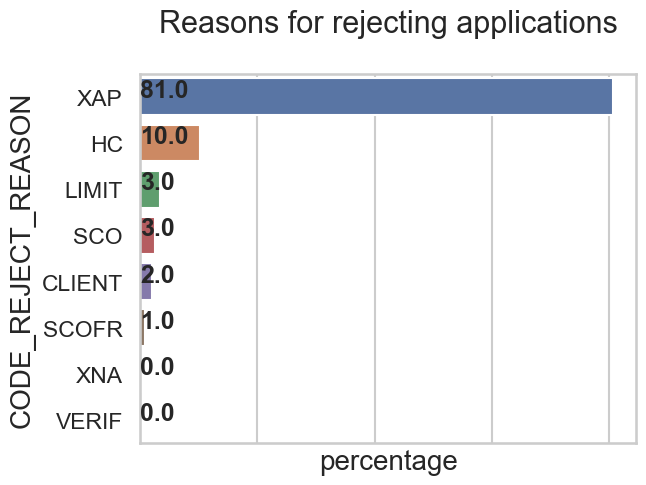

In [103]:
plot_trend('CODE_REJECT_REASON', 'Reasons for rejecting applications')

* Around 81% of rejected applications the reason is XAP(NA value) so the reason may not be applicable.
* Next significant reason is HC.

### Client payment methods





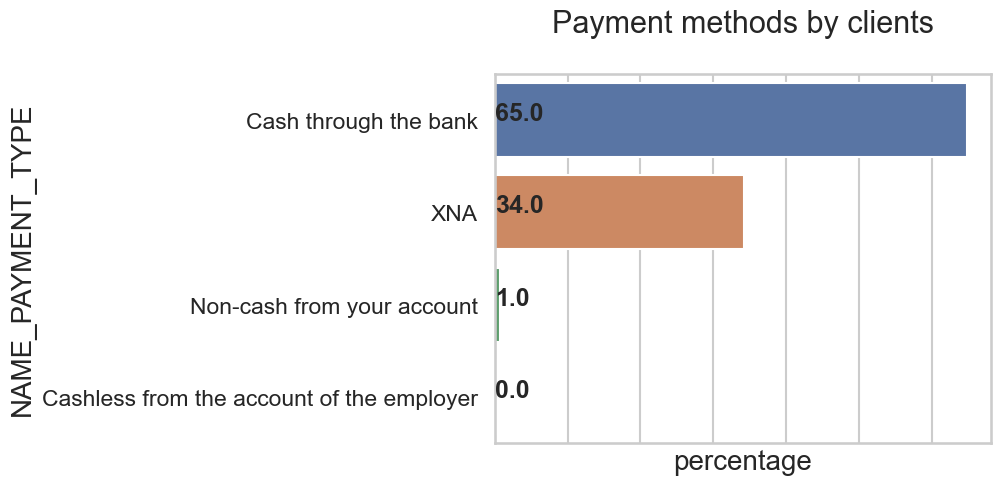

In [104]:
plot_trend('NAME_PAYMENT_TYPE', 'Payment methods by clients')

62% of chose to pay through cash by bank for previous applications.

### Approval, cancelled and refusal rates by channel types
CHANNEL_TYPE - Through which channel we acquired the client on the previous application.

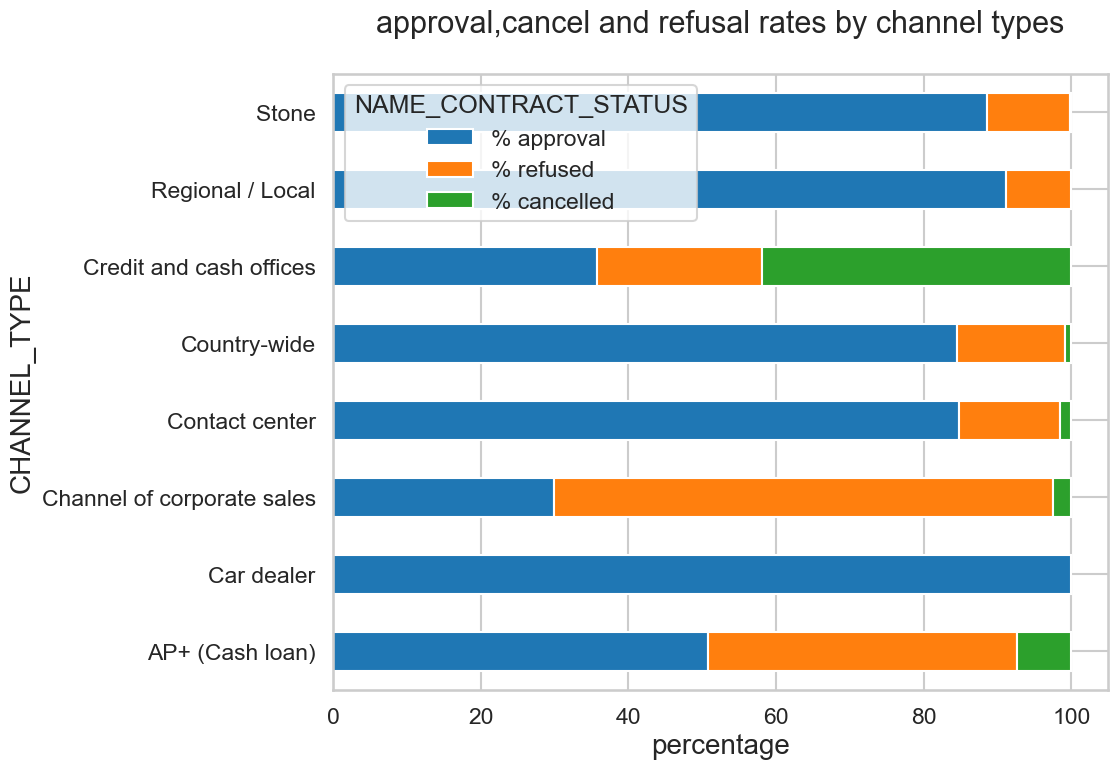

In [105]:
channel = pd.crosstab(prev_data["CHANNEL_TYPE"],prev_data["NAME_CONTRACT_STATUS"])
total= channel['Approved']+channel['Refused']+channel['Canceled']
channel["% approval"] = channel["Approved"]*100/total
channel["% refused"]  = channel["Refused"]*100/total
channel["% cancelled"] = channel["Canceled"]*100/total
channel = channel[["% approval","% refused","% cancelled"]]

ax = channel.plot(kind="barh",stacked=True,figsize=(10,8))
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

* Channel types like Stone, regional and country-wide have maximum approval rates.
* Channel of corporate sales and cash loans have maximum refusal rate.
* Credit-cash offices and Contact centres have maximum cancellation rates.

In [106]:
emptycol1=prev_data.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

14

In [107]:
prev_data

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0        2030495      271877     Consumer loans     1730.430          17145.0   
1        2802425      108129         Cash loans    25188.615         607500.0   
2        2523466      122040         Cash loans    15060.735         112500.0   
3        2819243      176158         Cash loans    47041.335         450000.0   
4        1784265      202054         Cash loans    31924.395         337500.0   
...          ...         ...                ...          ...              ...   
4994     2171217      210619         Cash loans          NaN              0.0   
4995     1702352      423105         Cash loans          NaN              0.0   
4996     2167810      416510         Cash loans    40002.975         675000.0   
4997     1576124      384903     Consumer loans          NaN              0.0   
4998     1209285      103734         Cash loans    11557.395         112500.0   

      AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0        17145.0               0.0          17145.0   
1       679671.0               NaN         607500.0   
2       136444.5               NaN         112500.0   
3       470790.0               NaN         450000.0   
4       404055.0               NaN         337500.0   
...          ...               ...              ...   
4994         0.0               NaN              NaN   
4995         0.0               NaN              NaN   
4996    767664.0               NaN         675000.0   
4997         0.0               NaN              NaN   
4998    168912.0               NaN         112500.0   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                      SATURDAY                       15   
1                      THURSDAY                       11   
2                       TUESDAY                       11   
3                        MONDAY                        7   
4                      THURSDAY                        9   
...                         ...                      ...   
4994                   THURSDAY                       16   
4995                     FRIDAY                       15   
4996                   SATURDAY                       12   
4997                     SUNDAY                       12   
4998                   SATURDAY                       13   

     FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                              Y                       1                0.0   
1                              Y                       1                NaN   
2                              Y                       1                NaN   
3                              Y                       1                NaN   
4                              Y                       1                NaN   
...                          ...                     ...                ...   
4994                           Y                       1                NaN   
4995                           Y                       1                NaN   
4996                           Y                       1                NaN   
4997                           Y                       1                NaN   
4998                           Y                       1                NaN   

      RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
0                  0.182832                  0.867336                    XAP   
1                       NaN                       NaN                    XNA   
2                       NaN                       NaN                    XNA   
3                       NaN                       NaN                    XNA   
4                       NaN                       NaN                Repairs   
...                     ...                       ...                    ...   
4994                    NaN                       NaN                    XNA   
4995                    NaN                       NaN         

In [108]:
prev_data.shape

(4999, 37)

Removing the column values of 'XNA' and 'XAP'.

In [109]:
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

prev_data.shape

(187, 37)

Merging applications data along with the previous applications data for better insights.

In [110]:
new_df=pd.merge(left=df_app,right=prev_data,how='inner',on='SK_ID_CURR',suffixes='_x')

Renaming the column names after merging.

In [111]:
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

Removing unwanted columns for analysis

In [112]:
new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)